# Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

file_path_1 = "/content/drive/MyDrive/Unibo/LB2/positive.tsv"
file_path_2 = "/content/drive/MyDrive/Unibo/LB2/negative.tsv"

positive_data = pd.read_csv(file_path_1, sep="\t")
negative_data = pd.read_csv(file_path_2, sep="\t")

positive_data.head()

,Accession,Organism,Kingdom,Sequence length,SP cleavage
0,O00300,Homo sapiens,Metazoa,401,21
1,O00478,Homo sapiens,Metazoa,584,29
2,O00748,Homo sapiens,Metazoa,559,26
3,O14763,Homo sapiens,Metazoa,440,55
4,O43155,Homo sapiens,Metazoa,660,35


## analysis Fig

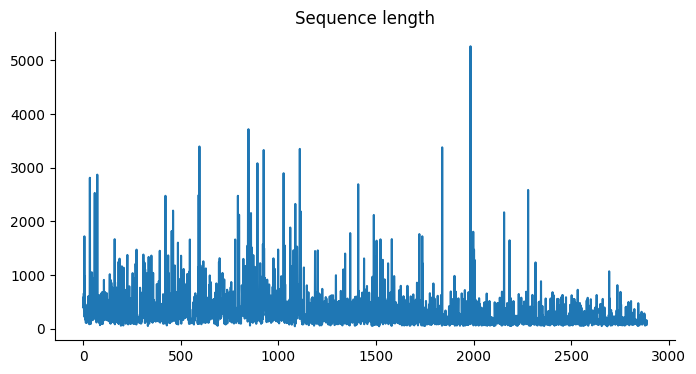

In [ ]:
# @title Sequence length

from matplotlib import pyplot as plt
positive_data['Sequence length'].plot(kind='line', figsize=(8, 4), title='Sequence length')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-4-cddb572037de>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(positive_data, x='SP cleavage', y='Kingdom', inner='box', palette='Dark2')


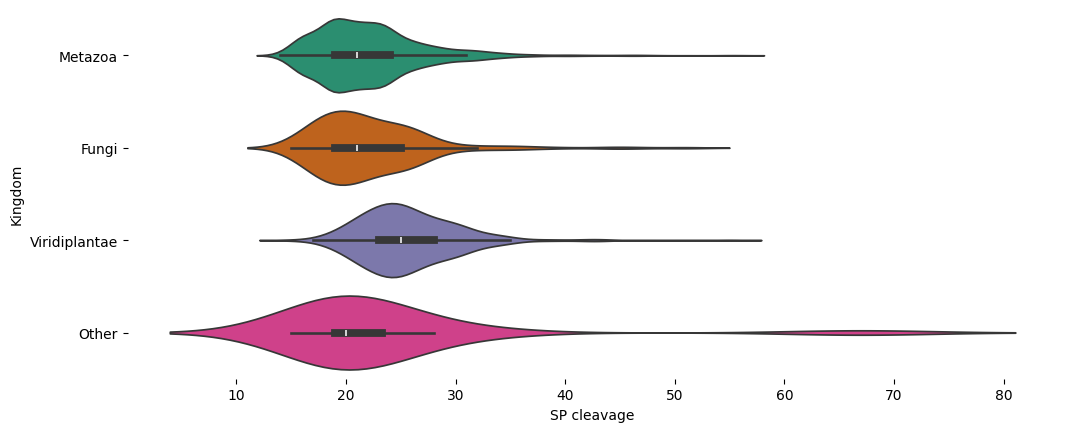

In [ ]:
# @title Kingdom vs SP cleavage

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(positive_data['Kingdom'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(positive_data, x='SP cleavage', y='Kingdom', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

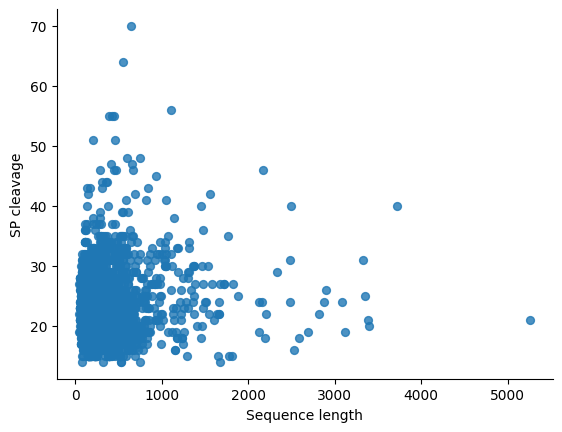

In [ ]:
# @title Sequence length vs SP cleavage

from matplotlib import pyplot as plt
positive_data.plot(kind='scatter', x='Sequence length', y='SP cleavage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Retrieve a preliminary dataset of positive data

In [ ]:
# Filter out sequences shorter than 40 residues
filtered_positive_data = positive_data[positive_data['Sequence length'] >= 40]

# Filter out proteins with SP shorter than 14 residues
filtered_positive_data = filtered_positive_data[filtered_positive_data['SP cleavage'] >= 14]

filtered_positive_data = filtered_positive_data[filtered_positive_data['SP cleavage'].isnull()]

In [ ]:
negative_data.head()

,Accession,Organism,Kingdom,Sequence length,N-term transmembrane
0,Q9UHK6,Homo sapiens,Metazoa,382,False
1,A3KMH1,Homo sapiens,Metazoa,1905,False
2,O75874,Homo sapiens,Metazoa,414,False
3,Q9NTK1,Homo sapiens,Metazoa,212,False
4,Q9BTZ2,Homo sapiens,Metazoa,278,False


## Analysis Fig

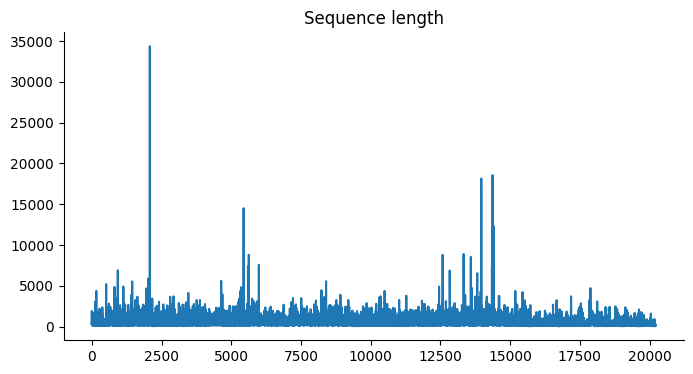

In [ ]:
# @title Sequence length

from matplotlib import pyplot as plt
negative_data['Sequence length'].plot(kind='line', figsize=(8, 4), title='Sequence length')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-9-0851ad9b9e73>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(negative_data, x='Sequence length', y='Kingdom', inner='box', palette='Dark2')


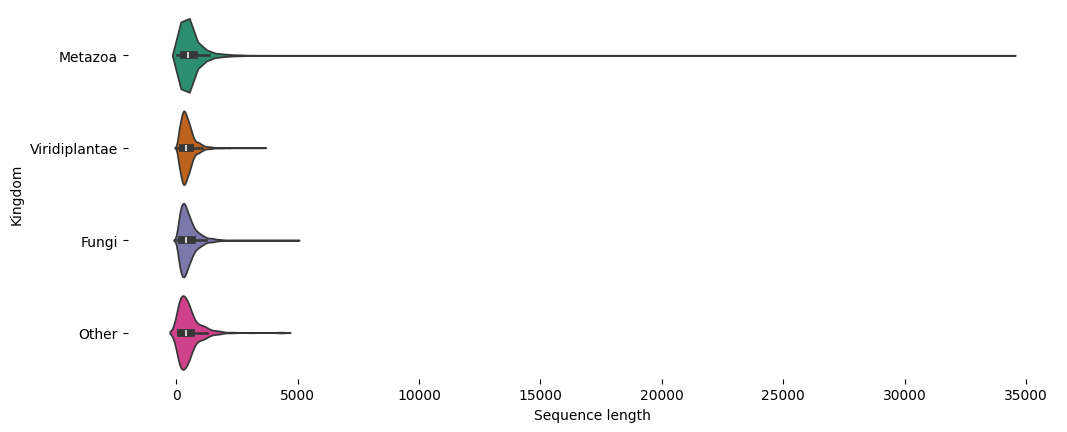

In [ ]:
# @title Kingdom vs Sequence length

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(negative_data['Kingdom'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(negative_data, x='Sequence length', y='Kingdom', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
filtered_negaative_data = negative_data[negative_data['Sequence length'] >= 40]

filtered_negaative_data = negative_data[negative_data['N-term transmembrane'] == False]


✈ install  mmseqs2 for clustering

In [ ]:
!apt-get update && apt-get install -y wget gnupg2
!wget -qO - https://packages.mmseqs.com/keys/MMseqs2-release.gpg.key |  apt-key add -
!echo "deb [arch=amd64] https://packages.mmseqs.com/ubuntu/ bionic main" |  tee /etc/apt/sources.list.d/mmseqs2.list
!apt-get update
!apt-get install -y mmseqs2

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,589 kB]
Get:14 http://security.ubuntu.com/ubuntu j

In [ ]:
!mmseqs easy-cluster positive.fasta cluster-results-pos tmp --min-seq-id 0.3 \-c 0.4 --cov-mode 0 --cluster-mode 1

Create directory tmp
easy-cluster positive.fasta cluster-results-pos tmp --min-seq-id 0.3 -c 0.4 --cov-mode 0 --cluster-mode 1 

MMseqs Version:                     	13-45111+ds-2
Substitution matrix                 	nucl:nucleotide.out,aa:blosum62.out
Seed substitution matrix            	nucl:nucleotide.out,aa:VTML80.out
Sensitivity                         	4
k-mer length                        	0
k-score                             	2147483647
Alphabet size                       	nucl:5,aa:21
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.4
Coverage mode                       	0
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                       	1
Mask lower case residues            	0
Minimum diagonal score

In [ ]:
!mmseqs easy-cluster negative.fasta cluster-results-neg tmp --min-seq-id 0.3 \-c 0.4 --cov-mode 0 --cluster-mode 1

easy-cluster negative.fasta cluster-results-neg tmp --min-seq-id 0.3 -c 0.4 --cov-mode 0 --cluster-mode 1 

MMseqs Version:                     	13-45111+ds-2
Substitution matrix                 	nucl:nucleotide.out,aa:blosum62.out
Seed substitution matrix            	nucl:nucleotide.out,aa:VTML80.out
Sensitivity                         	4
k-mer length                        	0
k-score                             	2147483647
Alphabet size                       	nucl:5,aa:21
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.4
Coverage mode                       	0
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                       	1
Mask lower case residues            	0
Minimum diagonal score              	15
Inc

### shuffle pos data

In [ ]:
import random

input_file_pos = '/content/drive/MyDrive/Unibo/LB2/cluster-results-pos_rep_seq.fasta'
output_file__pos = 'shuffled_pos_seq.fasta'

input_file_neg = '/content/drive/MyDrive/Unibo/LB2/cluster-results-neg_rep_seq.fasta'
output_file__neg = 'shuffled_neg_seq.fasta'

# Function to read a file and return pairs of lines (header and sequence)
def read_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [(lines[i], lines[i+1]) for i in range(0, len(lines), 2)]

# Function to shuffle and save a file
def shuffle_and_save_file(input_file_path, output_file_path):
    # Step 1: Read the file
    pairs = read_file(input_file_path)

    # Step 2: Shuffle the pairs
    random.shuffle(pairs)

    # Step 3: Save the shuffled pairs back to a new file
    with open(output_file_path, 'w') as file:
        for pair in pairs:
            file.writelines(pair)
# Shuffle and save both files independently
shuffle_and_save_file(input_file_pos, output_file__pos)
shuffle_and_save_file(input_file_neg, output_file__neg)


# turn to 80 /20 each file

## turn to 80/20 pos **data**

In [ ]:
# File paths for input and output
input_file_path = '/content/shuffled_pos_seq.fasta'
output_file_path_80 = 'pos_seq_80.fasta'
output_file_path_20 = 'pos_seq_20.fasta'

# Function to read a file and return pairs of lines (header and sequence)
def read_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [(lines[i], lines[i+1]) for i in range(0, len(lines), 2)]

# Function to split a file into two output files (80% and 20%) without shuffling
def split_file(input_file_path, output_file_path_80, output_file_path_20):
    # Step 1: Read the file
    pairs = read_file(input_file_path)

    # Step 2: Split the data into 80% and 20%
    split_index = int(0.8 * len(pairs))
    pairs_80 = pairs[:split_index]
    pairs_20 = pairs[split_index:]

    # Step 3: Save the 80% data to one file
    with open(output_file_path_80, 'w') as file_80:
        for pair in pairs_80:
            file_80.writelines(pair)

    # Step 4: Save the 20% data to another file
    with open(output_file_path_20, 'w') as file_20:
        for pair in pairs_20:
            file_20.writelines(pair)

# Split the file into 80% and 20% based on the original order
split_file(input_file_path, output_file_path_80, output_file_path_20)

print(f"Sequences saved to {output_file_path_80} (80%) and {output_file_path_20} (20%)")


Sequences saved to pos_seq_80.fasta (80%) and pos_seq_20.fasta (20%)


## turn to 80/20 neg **data**

In [ ]:
# File paths for input and output
input_file_path = '/content/shuffled_neg_seq.fasta'
output_file_path_80 = 'neg_seq_80.fasta'
output_file_path_20 = 'neg_seq_20.fasta'

# Function to read a file and return pairs of lines (header and sequence)
def read_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [(lines[i], lines[i+1]) for i in range(0, len(lines), 2)]

# Function to split a file into two output files (80% and 20%) without shuffling
def split_file(input_file_path, output_file_path_80, output_file_path_20):
    # Step 1: Read the file
    pairs = read_file(input_file_path)

    # Step 2: Split the data into 80% and 20%
    split_index = int(0.8 * len(pairs))
    pairs_80 = pairs[:split_index]
    pairs_20 = pairs[split_index:]

    # Step 3: Save the 80% data to one file
    with open(output_file_path_80, 'w') as file_80:
        for pair in pairs_80:
            file_80.writelines(pair)

    # Step 4: Save the 20% data to another file
    with open(output_file_path_20, 'w') as file_20:
        for pair in pairs_20:
            file_20.writelines(pair)

# Split the file into 80% and 20% based on the original order
split_file(input_file_path, output_file_path_80, output_file_path_20)

print(f"Sequences saved to {output_file_path_80} (80%) and {output_file_path_20} (20%)")


Sequences saved to neg_seq_80.fasta (80%) and neg_seq_20.fasta (20%)


## split 80% pos to 5 section

In [ ]:
# File paths for input and output
input_file_path = '/content/drive/MyDrive/Unibo/LB2/pos_seq_80.fasta'
output_file_path_1 = 'pos_seq_1.fasta'
output_file_path_2 = 'pos_seq_2.fasta'
output_file_path_3 = 'pos_seq_3.fasta'
output_file_path_4 = 'pos_seq_4.fasta'
output_file_path_5 = 'pos_seq_5.fasta'

# Function to read a file and return pairs of lines (header and sequence)
def read_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [(lines[i], lines[i+1]) for i in range(0, len(lines), 2)]

# Function to split the file into 5 equal parts (each 20%)
def split_file(input_file_path, output_files):
    # Step 1: Read the file
    pairs = read_file(input_file_path)

    # Step 2: Calculate the split size (20% of the data)
    split_size = len(pairs) // 5  # Integer division to get the size of each split

    # Step 3: Split the pairs into 5 equal parts
    split_data = [pairs[i * split_size:(i + 1) * split_size] for i in range(5)]

    # Step 4: Save each split to its respective file
    for i, output_file in enumerate(output_files):
        with open(output_file, 'w') as file:
            for pair in split_data[i]:
                file.writelines(pair)

# List of output file paths
output_files = [output_file_path_1, output_file_path_2, output_file_path_3, output_file_path_4, output_file_path_5]

# Split the file into 5 equal parts and save them
split_file(input_file_path, output_files)

print(f"Sequences saved to {output_files}")

Sequences saved to ['pos_seq_1.fasta', 'pos_seq_2.fasta', 'pos_seq_3.fasta', 'pos_seq_4.fasta', 'pos_seq_5.fasta']


## split 80% neg to 5 section

In [ ]:
# File paths for input and output
input_file_path = '/content/drive/MyDrive/Unibo/LB2/neg_seq_80.fasta'
output_file_path_1 = 'neg_seq_1.fasta'
output_file_path_2 = 'neg_seq_2.fasta'
output_file_path_3 = 'neg_seq_3.fasta'
output_file_path_4 = 'neg_seq_4.fasta'
output_file_path_5 = 'neg_seq_5.fasta'

# Function to read a file and return pairs of lines (header and sequence)
def read_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [(lines[i], lines[i+1]) for i in range(0, len(lines), 2)]

# Function to split the file into 5 equal parts (each 20%)
def split_file(input_file_path, output_files):
    # Step 1: Read the file
    pairs = read_file(input_file_path)

    # Step 2: Calculate the split size (20% of the data)
    split_size = len(pairs) // 5  # Integer division to get the size of each split

    # Step 3: Split the pairs into 5 equal parts
    split_data = [pairs[i * split_size:(i + 1) * split_size] for i in range(5)]

    # Step 4: Save each split to its respective file
    for i, output_file in enumerate(output_files):
        with open(output_file, 'w') as file:
            for pair in split_data[i]:
                file.writelines(pair)

# List of output file paths
output_files = [output_file_path_1, output_file_path_2, output_file_path_3, output_file_path_4, output_file_path_5]

# Split the file into 5 equal parts and save them
split_file(input_file_path, output_files)

print(f"Sequences saved to {output_files}")

Sequences saved to ['neg_seq_1.fasta', 'neg_seq_2.fasta', 'neg_seq_3.fasta', 'neg_seq_4.fasta', 'neg_seq_5.fasta']


# merge pos and neg (80)


> which they are 5 section





In [ ]:
# File paths for input and output
input_file_path_neg_1 = '/content/drive/MyDrive/Unibo/LB2/neg_seq_1.fasta'
input_file_path_neg_2 = '/content/drive/MyDrive/Unibo/LB2/neg_seq_2.fasta'
input_file_path_neg_3 = '/content/drive/MyDrive/Unibo/LB2/neg_seq_3.fasta'
input_file_path_neg_4 = '/content/drive/MyDrive/Unibo/LB2/neg_seq_4.fasta'
input_file_path_neg_5 = '/content/drive/MyDrive/Unibo/LB2/neg_seq_5.fasta'

input_file_path_pos_1 = '/content/drive/MyDrive/Unibo/LB2/pos_seq_1.fasta'
input_file_path_pos_2 = '/content/drive/MyDrive/Unibo/LB2/pos_seq_2.fasta'
input_file_path_pos_3 = '/content/drive/MyDrive/Unibo/LB2/pos_seq_3.fasta'
input_file_path_pos_4 = '/content/drive/MyDrive/Unibo/LB2/pos_seq_4.fasta'
input_file_path_pos_5 = '/content/drive/MyDrive/Unibo/LB2/pos_seq_5.fasta'

output_file_path_1 = 'train_seq_1.fasta'
output_file_path_2 = 'train_seq_2.fasta'
output_file_path_3 = 'train_seq_3.fasta'
output_file_path_4 = 'train_seq_4.fasta'
output_file_path_5 = 'train_seq_5.fasta'

# Function to read a file and return its lines (header and sequence)
def read_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

# Function to merge two files (positive and negative sequences) and save to a new file
def merge_files(neg_file_path, pos_file_path, output_file_path):
    # Step 1: Read the negative and positive sequence files
    neg_lines = read_file(neg_file_path)
    pos_lines = read_file(pos_file_path)

    # Step 2: Combine the sequences
    merged_lines = neg_lines + pos_lines

    # Step 3: Save the merged sequences to a new file
    with open(output_file_path, 'w') as file:
        file.writelines(merged_lines)

# Merge each pair of files
merge_files(input_file_path_neg_1, input_file_path_pos_1, output_file_path_1)
merge_files(input_file_path_neg_2, input_file_path_pos_2, output_file_path_2)
merge_files(input_file_path_neg_3, input_file_path_pos_3, output_file_path_3)
merge_files(input_file_path_neg_4, input_file_path_pos_4, output_file_path_4)
merge_files(input_file_path_neg_5, input_file_path_pos_5, output_file_path_5)

print("Merging complete. Files saved as train_seq_1.fasta, train_seq_2.fasta, train_seq_3.fasta, train_seq_4.fasta, and train_seq_5.fasta")


Merging complete. Files saved as train_seq_1.fasta, train_seq_2.fasta, train_seq_3.fasta, train_seq_4.fasta, and train_seq_5.fasta


# merge pos and neg (20)

In [ ]:
# These 20% negative and positive files are for benchmark (test)
# File paths for input and output
input_file_path_neg_20 = '/content/drive/MyDrive/Unibo/LB2/neg_seq_20.fasta'
input_file_path_pos_20 = '/content/drive/MyDrive/Unibo/LB2/pos_seq_20.fasta'
output_file_path_merged = 'benchmark_seq.fasta'

# Function to read a file and return pairs of lines (header and sequence)
def read_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Return list of pairs: header and sequence
    return [(lines[i], lines[i+1]) for i in range(0, len(lines), 2)]

# Function to merge two files (20% negative and 20% positive) and save to a new output file
def merge_files(input_file_path_neg_20, input_file_path_pos_20, output_file_path_merged):
    # Step 1: Read the 20% negative and positive sequence files
    neg_pairs = read_file(input_file_path_neg_20)
    pos_pairs = read_file(input_file_path_pos_20)

    # Step 2: Merge the sequences from both files
    merged_pairs = neg_pairs + pos_pairs

    # Step 3: Save the merged sequences to a new file
    with open(output_file_path_merged, 'w') as file_merged:
        for pair in merged_pairs:
            file_merged.writelines(pair)

# Merge the 20% positive and 20% negative files
merge_files(input_file_path_neg_20, input_file_path_pos_20, output_file_path_merged)

print(f"20% sequences from {input_file_path_neg_20} and {input_file_path_pos_20} merged and saved to {output_file_path_merged}")

20% sequences from /content/drive/MyDrive/Unibo/LB2/neg_seq_20.fasta and /content/drive/MyDrive/Unibo/LB2/pos_seq_20.fasta merged and saved to benchmark_seq.fasta


## visualize data

Approach Breakdown:
1. SP Length Distribution:
Extract signal peptides (SPs) from your dataset, compute their lengths, and generate a histogram showing the distribution of SP lengths.
2. Protein Length Distribution:
Compute the lengths of the full proteins from both positive and negative datasets.
Create histograms for both positive and negative datasets to compare the distributions of protein lengths.
3. Comparative Amino Acid Composition:
Compute the amino acid composition of SPs in your dataset and compare it to the background distribution (e.g., SwissProt).
Generate bar charts to compare the frequency of each amino acid.
4. Taxonomic Classification:
Analyze taxonomic information if available in your datasets (kingdom and species levels).
Visualize the taxonomic distribution using pie charts or bar charts.
5. Sequence Logos of SP Cleavage Sites:
Identify cleavage sites within SPs and generate sequence logos (graphical representations of sequence conservation at cleavage sites).

In [ ]:
# fist merge  pos_seq_80.fasta and neg_seq_80.fasta to one file named train_seq.fasta
# second create a plot for benchmark_seq.fasta and rain_seq.fasta

In [ ]:
#test

In [ ]:
# pos.tsv diwstribution histogram

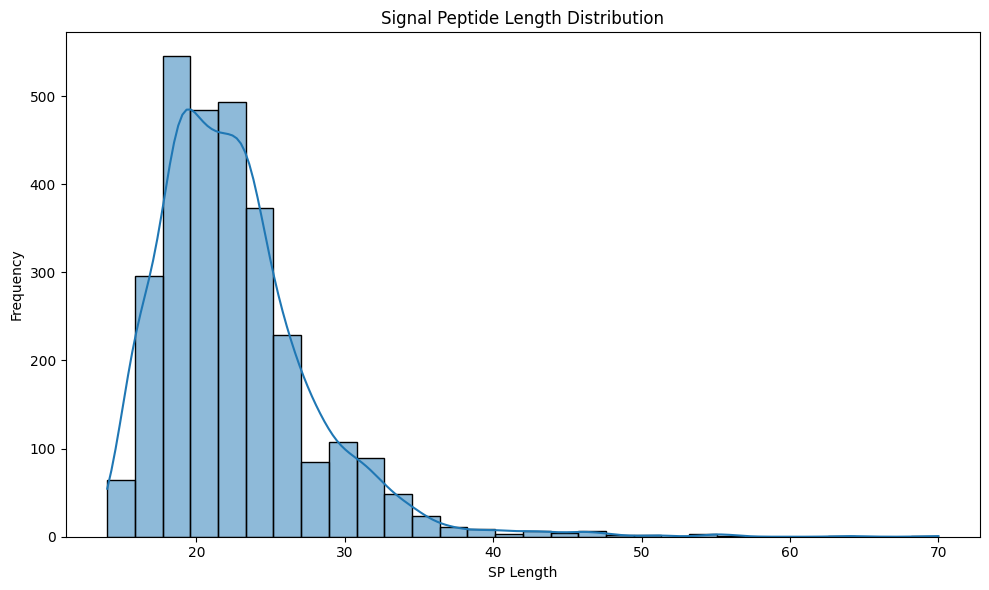

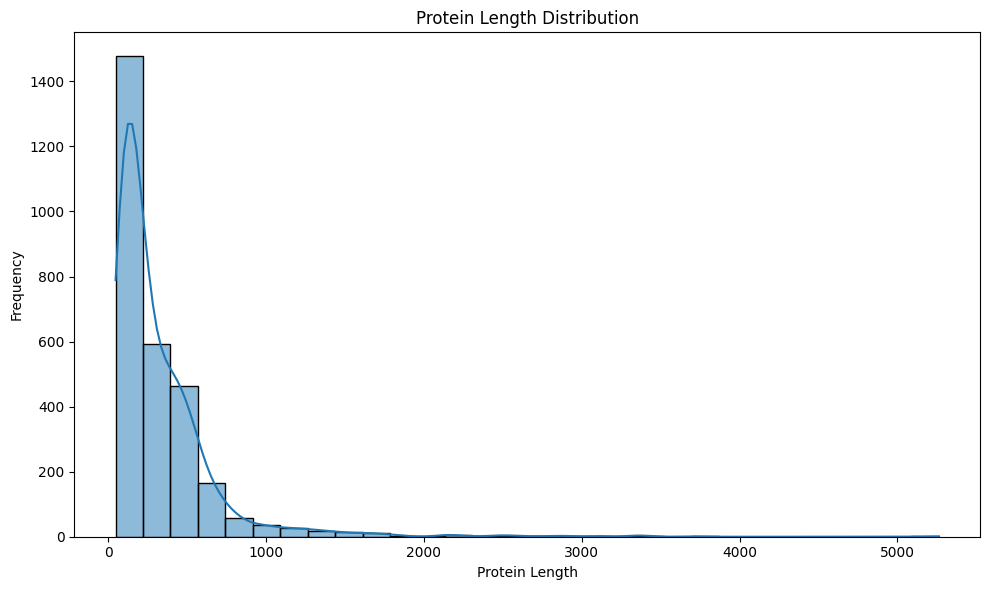

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the pos.tsv file
pos_tsv_path = '/content/drive/MyDrive/Unibo/LB2/positive.tsv'  # Replace with the actual file path

# Read the .tsv file
pos_df = pd.read_csv(pos_tsv_path, sep='\t')

# Check if the necessary columns are present in the .tsv file
if 'SP cleavage' in pos_df.columns and 'Sequence length' in pos_df.columns:
    # Use 'SP cleavage' as SP length (assuming this indicates the cleavage site position)
    sp_lengths = pos_df['SP cleavage'].dropna()

    # Use 'Sequence length' as Protein length
    protein_lengths = pos_df['Sequence length'].dropna()

    # Combine data into a DataFrame for easier plotting
    data = pd.DataFrame({
        'SP Length': sp_lengths,
        'Protein Length': protein_lengths,
        'Dataset': ['Positive'] * len(sp_lengths)  # Since we're using the pos.tsv file
    })

    # Plot distribution of SP lengths
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='SP Length', bins=30, kde=True)
    plt.title('Signal Peptide Length Distribution')
    plt.xlabel('SP Length')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Plot distribution of Protein lengths
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='Protein Length', bins=30, kde=True)
    plt.title('Protein Length Distribution')
    plt.xlabel('Protein Length')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

else:
    print("The necessary columns 'SP cleavage' and 'Sequence length' are not found in the .tsv file.")


In [ ]:
## corected

In [ ]:
#test

In [ ]:
# pos.tsv and pos.fasta [:i] i =sef recognize sp lenghth in tsv file

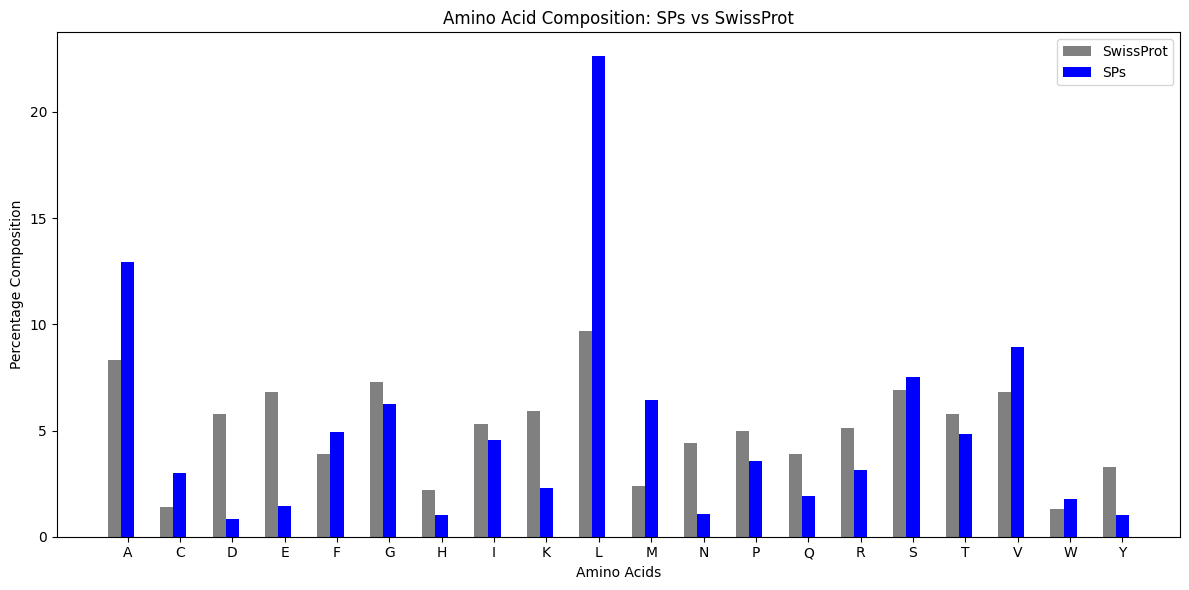

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Function to compute amino acid composition for a list of sequences
def compute_aa_composition(sequences):
    aa_count = Counter()
    total_aa = 0
    for seq in sequences:
        aa_count.update(seq)
        total_aa += len(seq)
    return {aa: count / total_aa for aa, count in aa_count.items()}

# Function to extract signal peptides based on cleavage length from tsv and fasta sequences
def extract_signal_peptides(tsv_df, fasta_sequences):
    signal_peptides = []
    for _, row in tsv_df.iterrows():
        sp_length = row['SP cleavage']
        accession = row['Accession']

        # Find corresponding sequence in fasta file
        for header, seq in fasta_sequences:
            if accession in header:
                signal_peptides.append(seq[:sp_length])  # Extract SP length from sequence
                break
    return signal_peptides

# Function to read a FASTA file and return headers and sequences
def read_fasta(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    headers = [lines[i].strip() for i in range(0, len(lines), 2)]  # Protein IDs
    sequences = [lines[i+1].strip() for i in range(0, len(lines), 2)]  # Protein sequences
    return list(zip(headers, sequences))

# File paths for the pos.tsv and fasta files
tsv_file_path = '/content/drive/MyDrive/Unibo/LB2/positive.tsv'  # Replace with actual path to positive.tsv
fasta_file_path = '/content/drive/MyDrive/Unibo/LB2/positive.fasta'  # Replace with actual path to pos_seq.fasta


# Read the .tsv file and FASTA file
pos_df = pd.read_csv(tsv_file_path, sep='\t')
fasta_sequences = read_fasta(fasta_file_path)

# Extract signal peptides based on cleavage length in tsv file
signal_peptides = extract_signal_peptides(pos_df, fasta_sequences)

# Compute amino acid composition for the extracted signal peptides
sp_aa_composition = compute_aa_composition(signal_peptides)

# SwissProt amino acid composition for comparison (as an example from SwissProt stats)
swissprot_aa_comp = {
    'A': 8.3, 'C': 1.4, 'D': 5.8, 'E': 6.8, 'F': 3.9, 'G': 7.3, 'H': 2.2,
    'I': 5.3, 'K': 5.9, 'L': 9.7, 'M': 2.4, 'N': 4.4, 'P': 5.0, 'Q': 3.9,
    'R': 5.1, 'S': 6.9, 'T': 5.8, 'V': 6.8, 'W': 1.3, 'Y': 3.3
}

# Create a DataFrame for plotting
amino_acids = list(swissprot_aa_comp.keys())
swissprot_values = list(swissprot_aa_comp.values())
sp_values = [sp_aa_composition.get(aa, 0) * 100 for aa in amino_acids]

# Plot the amino acid composition
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(amino_acids))

plt.bar(index, swissprot_values, bar_width, label='SwissProt', color='gray')
plt.bar([i + bar_width for i in index], sp_values, bar_width, label='SPs', color='b')

plt.title('Amino Acid Composition: SPs vs SwissProt')
plt.xlabel('Amino Acids')
plt.ylabel('Percentage Composition')
plt.xticks([i + bar_width for i in index], amino_acids)
plt.legend()
plt.tight_layout()
plt.show()


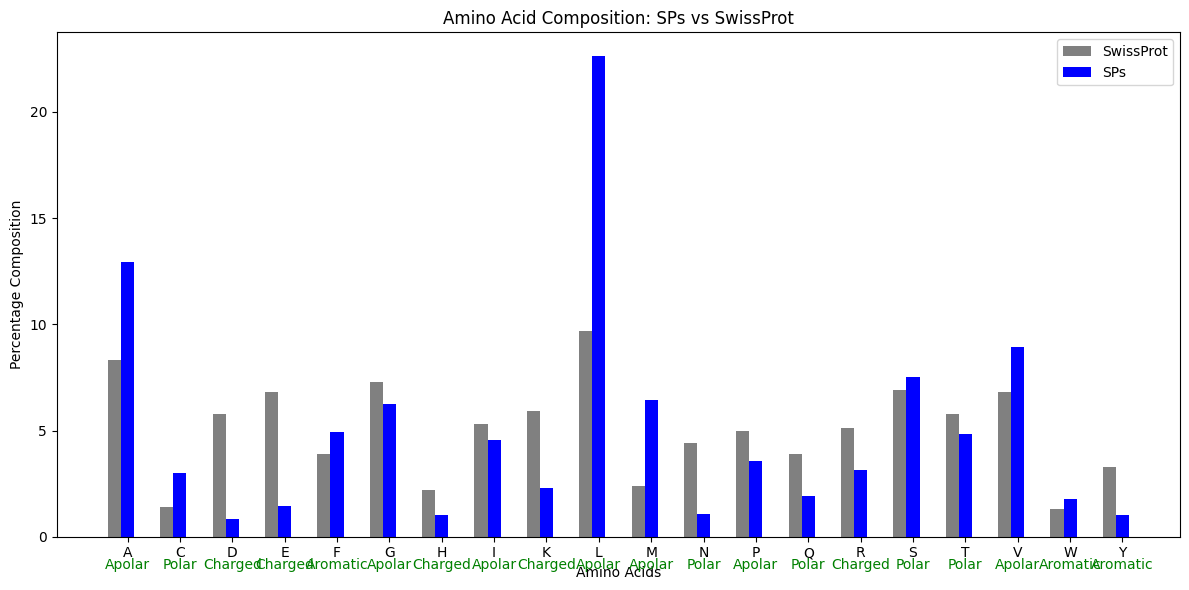

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Function to compute amino acid composition for a list of sequences
def compute_aa_composition(sequences):
    aa_count = Counter()
    total_aa = 0
    for seq in sequences:
        aa_count.update(seq)
        total_aa += len(seq)
    return {aa: count / total_aa for aa, count in aa_count.items()}

# Function to extract signal peptides based on cleavage length from tsv and fasta sequences
def extract_signal_peptides(tsv_df, fasta_sequences):
    signal_peptides = []
    for _, row in tsv_df.iterrows():
        sp_length = row['SP cleavage']
        accession = row['Accession']

        # Find corresponding sequence in fasta file
        for header, seq in fasta_sequences:
            if accession in header:
                signal_peptides.append(seq[:sp_length])  # Extract SP length from sequence
                break
    return signal_peptides

# Function to read a FASTA file and return headers and sequences
def read_fasta(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    headers = [lines[i].strip() for i in range(0, len(lines), 2)]  # Protein IDs
    sequences = [lines[i+1].strip() for i in range(0, len(lines), 2)]  # Protein sequences
    return list(zip(headers, sequences))

# File paths for the pos.tsv and fasta files
tsv_file_path = '/content/drive/MyDrive/Unibo/LB2/positive.tsv'  # Replace with actual path to positive.tsv
fasta_file_path = '/content/drive/MyDrive/Unibo/LB2/positive.fasta'  # Replace with actual path to pos_seq.fasta

# Read the .tsv file and FASTA file
pos_df = pd.read_csv(tsv_file_path, sep='\t')
fasta_sequences = read_fasta(fasta_file_path)

# Extract signal peptides based on cleavage length in tsv file
signal_peptides = extract_signal_peptides(pos_df, fasta_sequences)

# Compute amino acid composition for the extracted signal peptides
sp_aa_composition = compute_aa_composition(signal_peptides)

# SwissProt amino acid composition for comparison (as an example from SwissProt stats)
swissprot_aa_comp = {
    'A': 8.3, 'C': 1.4, 'D': 5.8, 'E': 6.8, 'F': 3.9, 'G': 7.3, 'H': 2.2,
    'I': 5.3, 'K': 5.9, 'L': 9.7, 'M': 2.4, 'N': 4.4, 'P': 5.0, 'Q': 3.9,
    'R': 5.1, 'S': 6.9, 'T': 5.8, 'V': 6.8, 'W': 1.3, 'Y': 3.3
}

# Amino acid categories (Apolar, Aromatic, Polar, Charged)
aa_categories = {
    'A': 'Apolar', 'C': 'Polar', 'D': 'Charged', 'E': 'Charged', 'F': 'Aromatic',
    'G': 'Apolar', 'H': 'Charged', 'I': 'Apolar', 'K': 'Charged', 'L': 'Apolar',
    'M': 'Apolar', 'N': 'Polar', 'P': 'Apolar', 'Q': 'Polar', 'R': 'Charged',
    'S': 'Polar', 'T': 'Polar', 'V': 'Apolar', 'W': 'Aromatic', 'Y': 'Aromatic'
}

# Create a DataFrame for plotting
amino_acids = list(swissprot_aa_comp.keys())
swissprot_values = list(swissprot_aa_comp.values())
sp_values = [sp_aa_composition.get(aa, 0) * 100 for aa in amino_acids]

# Create a category label list based on amino acid categories
category_labels = [aa_categories[aa] for aa in amino_acids]

# Plot the amino acid composition
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(amino_acids))

plt.bar(index, swissprot_values, bar_width, label='SwissProt', color='gray')
plt.bar([i + bar_width for i in index], sp_values, bar_width, label='SPs', color='b')

plt.title('Amino Acid Composition: SPs vs SwissProt')
plt.xlabel('Amino Acids')
plt.ylabel('Percentage Composition')

# Add x-tick labels for amino acids and categories
plt.xticks([i + bar_width for i in index], amino_acids)
plt.xticks(ticks=[i + bar_width for i in index], labels=amino_acids, rotation=0)

# Adding the residue type below the amino acids
for i, category in enumerate(category_labels):
    plt.text(i + bar_width, -1.5, category, ha='center', fontsize=10, rotation=0, color='green')

plt.legend()
plt.tight_layout()
plt.show()


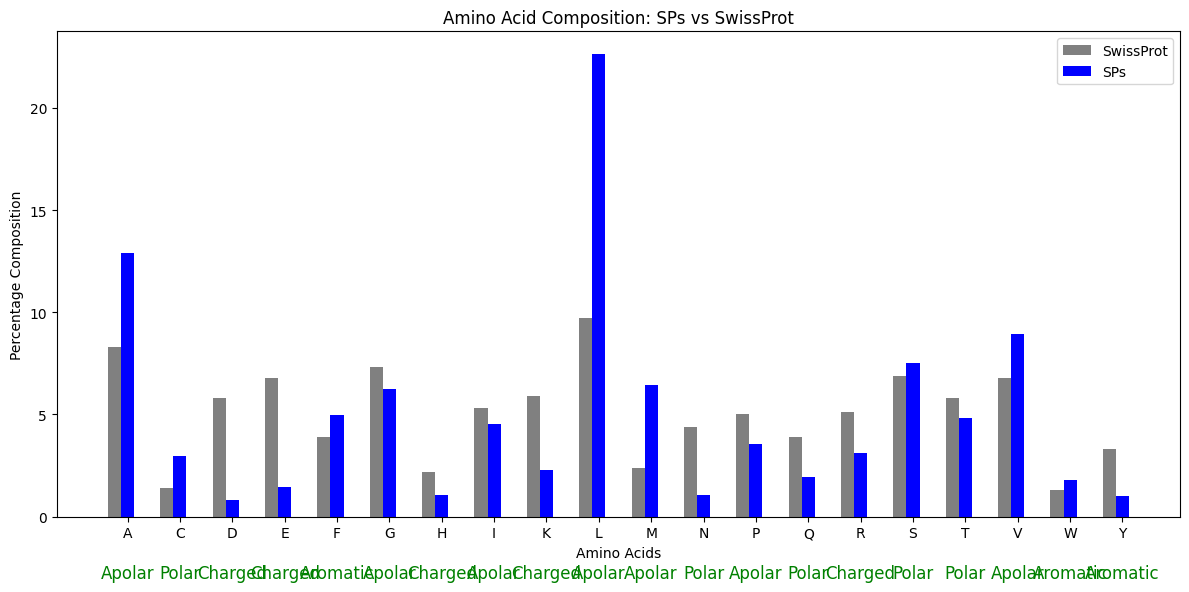

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Function to compute amino acid composition for a list of sequences
def compute_aa_composition(sequences):
    aa_count = Counter()
    total_aa = 0
    for seq in sequences:
        aa_count.update(seq)
        total_aa += len(seq)
    return {aa: count / total_aa for aa, count in aa_count.items()}

# Function to extract signal peptides based on cleavage length from tsv and fasta sequences
def extract_signal_peptides(tsv_df, fasta_sequences):
    signal_peptides = []
    for _, row in tsv_df.iterrows():
        sp_length = row['SP cleavage']
        accession = row['Accession']

        # Find corresponding sequence in fasta file
        for header, seq in fasta_sequences:
            if accession in header:
                signal_peptides.append(seq[:sp_length])  # Extract SP length from sequence
                break
    return signal_peptides

# Function to read a FASTA file and return headers and sequences
def read_fasta(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    headers = [lines[i].strip() for i in range(0, len(lines), 2)]  # Protein IDs
    sequences = [lines[i+1].strip() for i in range(0, len(lines), 2)]  # Protein sequences
    return list(zip(headers, sequences))

# File paths for the pos.tsv and fasta files
tsv_file_path = '/content/drive/MyDrive/Unibo/LB2/positive.tsv'  # Replace with actual path to positive.tsv
fasta_file_path = '/content/drive/MyDrive/Unibo/LB2/positive.fasta'  # Replace with actual path to pos_seq.fasta

# Read the .tsv file and FASTA file
pos_df = pd.read_csv(tsv_file_path, sep='\t')
fasta_sequences = read_fasta(fasta_file_path)

# Extract signal peptides based on cleavage length in tsv file
signal_peptides = extract_signal_peptides(pos_df, fasta_sequences)

# Compute amino acid composition for the extracted signal peptides
sp_aa_composition = compute_aa_composition(signal_peptides)

# SwissProt amino acid composition for comparison (as an example from SwissProt stats)
swissprot_aa_comp = {
    'A': 8.3, 'C': 1.4, 'D': 5.8, 'E': 6.8, 'F': 3.9, 'G': 7.3, 'H': 2.2,
    'I': 5.3, 'K': 5.9, 'L': 9.7, 'M': 2.4, 'N': 4.4, 'P': 5.0, 'Q': 3.9,
    'R': 5.1, 'S': 6.9, 'T': 5.8, 'V': 6.8, 'W': 1.3, 'Y': 3.3
}

# Amino acid categories (Apolar, Aromatic, Polar, Charged)
aa_categories = {
    'A': 'Apolar', 'C': 'Polar', 'D': 'Charged', 'E': 'Charged', 'F': 'Aromatic',
    'G': 'Apolar', 'H': 'Charged', 'I': 'Apolar', 'K': 'Charged', 'L': 'Apolar',
    'M': 'Apolar', 'N': 'Polar', 'P': 'Apolar', 'Q': 'Polar', 'R': 'Charged',
    'S': 'Polar', 'T': 'Polar', 'V': 'Apolar', 'W': 'Aromatic', 'Y': 'Aromatic'
}

# Create a DataFrame for plotting
amino_acids = list(swissprot_aa_comp.keys())
swissprot_values = list(swissprot_aa_comp.values())
sp_values = [sp_aa_composition.get(aa, 0) * 100 for aa in amino_acids]

# Create a category label list based on amino acid categories
category_labels = [aa_categories[aa] for aa in amino_acids]

# Plot the amino acid composition
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(amino_acids))

plt.bar(index, swissprot_values, bar_width, label='SwissProt', color='gray')
plt.bar([i + bar_width for i in index], sp_values, bar_width, label='SPs', color='b')

plt.title('Amino Acid Composition: SPs vs SwissProt')
plt.xlabel('Amino Acids')
plt.ylabel('Percentage Composition')

# Add x-tick labels for amino acids and categories
plt.xticks([i + bar_width for i in index], amino_acids)
plt.xticks(ticks=[i + bar_width for i in index], labels=amino_acids, rotation=0)

# Adding the residue type below the amino acids with more space and larger font
for i, category in enumerate(category_labels):
    plt.text(i + bar_width, -3, category, ha='center', fontsize=12, rotation=0, color='green')

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#  Sequence logos Fig

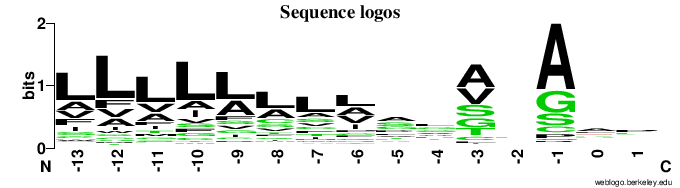

In [ ]:
# Load the uploaded .tsv files to inspect their contents
positive_tsv_path = "/content/drive/MyDrive/Unibo/LB2/positive.tsv"
negative_tsv_path = "/content/drive/MyDrive/Unibo/LB2/negative.tsv"

# Read the .tsv files into dataframes
positive_df = pd.read_csv(positive_tsv_path, sep='\t')
negative_df = pd.read_csv(negative_tsv_path, sep='\t')

# Display the first few rows of both dataframes to inspect the structure
positive_df.head(), negative_df.head()


(  Accession      Organism  Kingdom  Sequence length  SP cleavage
 0    O00300  Homo sapiens  Metazoa              401           21
 1    O00478  Homo sapiens  Metazoa              584           29
 2    O00748  Homo sapiens  Metazoa              559           26
 3    O14763  Homo sapiens  Metazoa              440           55
 4    O43155  Homo sapiens  Metazoa              660           35,
   Accession      Organism  Kingdom  Sequence length  N-term transmembrane
 0    Q9UHK6  Homo sapiens  Metazoa              382                 False
 1    A3KMH1  Homo sapiens  Metazoa             1905                 False
 2    O75874  Homo sapiens  Metazoa              414                 False
 3    Q9NTK1  Homo sapiens  Metazoa              212                 False
 4    Q9BTZ2  Homo sapiens  Metazoa              278                 False)

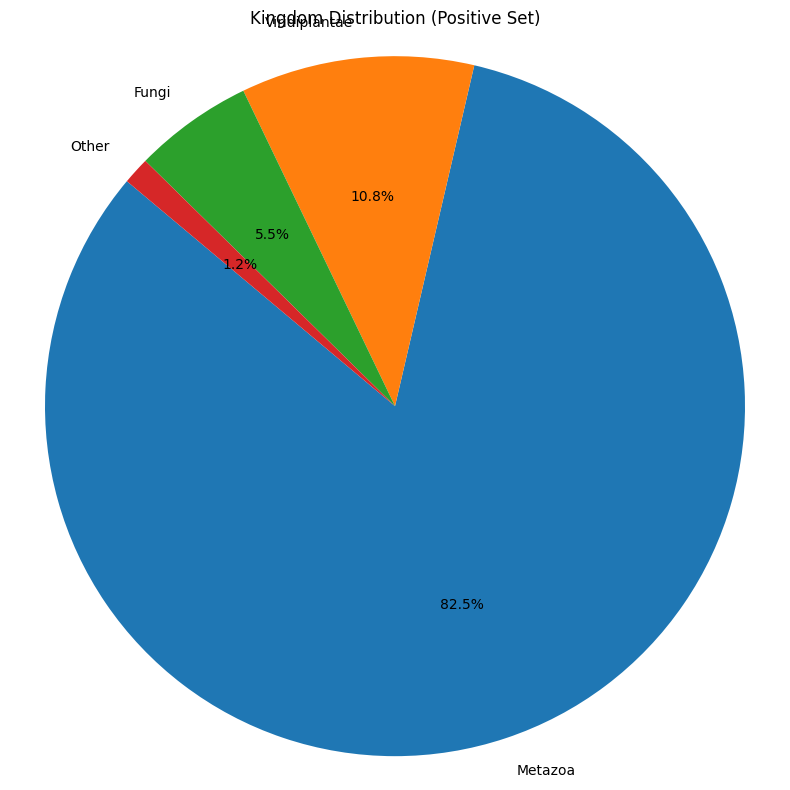

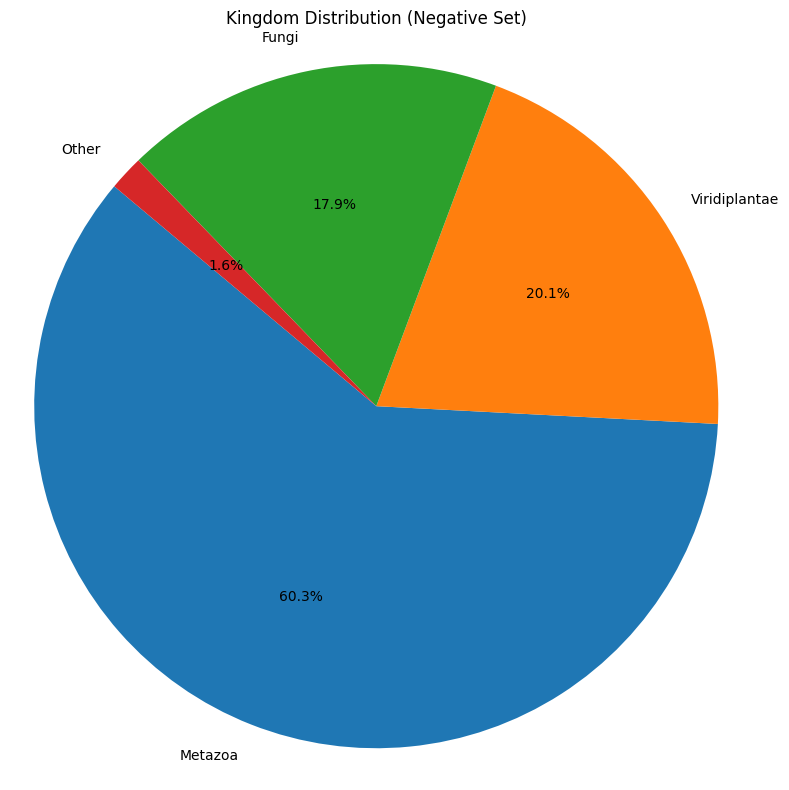

In [ ]:
# Function to create a pie chart based on the 'Kingdom' or 'Organism' column
def plot_taxonomic_distribution(df, column, dataset_type):
    # Count the occurrences of each unique value in the specified column
    classification_counts = df[column].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
    plt.title(f'{column} Distribution ({dataset_type.capitalize()} Set)')
    plt.tight_layout()
    plt.show()

# Plot taxonomic distribution for 'Kingdom' in both positive and negative datasets
plot_taxonomic_distribution(positive_df, 'Kingdom', 'positive')
plot_taxonomic_distribution(negative_df, 'Kingdom', 'negative')


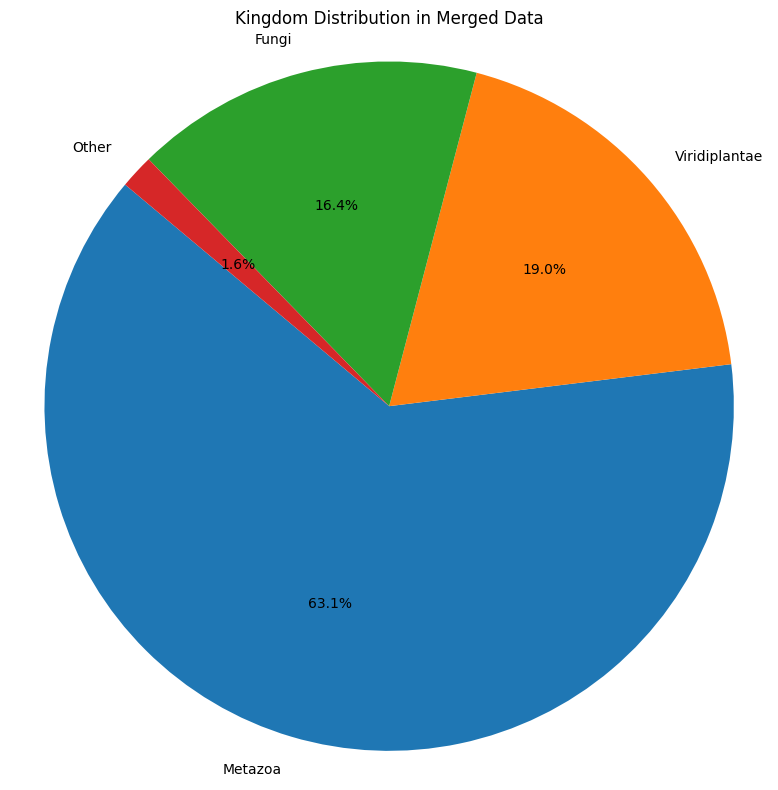

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the positive and negative .tsv files
# Replace 'path_to_file' with the actual path to your .tsv files
positive_tsv_path = "/content/drive/MyDrive/Unibo/LB2/positive.tsv"
negative_tsv_path = "/content/drive/MyDrive/Unibo/LB2/negative.tsv"

positive_df = pd.read_csv(positive_tsv_path, sep='\t')
negative_df = pd.read_csv(negative_tsv_path, sep='\t')

# Add a 'Dataset' column to distinguish between positive and negative data
positive_df['Dataset'] = 'positive'
negative_df['Dataset'] = 'negative'

# Merge the two DataFrames
merged_df = pd.concat([positive_df, negative_df], ignore_index=True)

# Function to create a pie chart based on the 'Kingdom' or 'Organism' column
def plot_taxonomic_distribution(df, column):
    # Count the occurrences of each unique value in the specified column
    classification_counts = df[column].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
    plt.title(f'{column} Distribution in Merged Data')
    plt.tight_layout()
    plt.show()

# Plot taxonomic distribution for 'Kingdom' in the merged dataset
plot_taxonomic_distribution(merged_df, 'Kingdom')


# The vonHeijne method for SP detection

In [ ]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 20.5 MB/s eta 0:00:00


In [ ]:
"""
composition = [
    {'train': [1, 2, 3], 'validation': [4], 'test': [5]},
    {'train': [2, 3, 4], 'validation': [5], 'test': [1]},
    {'train': [3, 4, 5], 'validation': [1], 'test': [2]},
    {'train': [4, 5, 1], 'validation': [2], 'test': [3]},
    {'train': [5, 1, 2], 'validation': [3], 'test': [4]},
]
"""

"\ncomposition = [\n    {'train': [1, 2, 3], 'validation': [4], 'test': [5]},\n    {'train': [2, 3, 4], 'validation': [5], 'test': [1]},\n    {'train': [3, 4, 5], 'validation': [1], 'test': [2]},\n    {'train': [4, 5, 1], 'validation': [2], 'test': [3]},\n    {'train': [5, 1, 2], 'validation': [3], 'test': [4]},\n]\n"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score

# File paths for positive and negative tsv files
positive_tsv = '/content/drive/MyDrive/Unibo/LB2/positive.tsv'
negative_tsv = '/content/drive/MyDrive/Unibo/LB2/negative.tsv'

# Function to read labels from positive and negative tsv files
def read_labels_from_tsv():
    # Load positive sequences
    pos_df = pd.read_csv(positive_tsv, sep='\t')
    pos_labels = {row['Accession']: (1, row['SP cleavage']) for _, row in pos_df.iterrows()}

    # Load negative sequences
    neg_df = pd.read_csv(negative_tsv, sep='\t')
    neg_labels = {row['Accession']: (0, None) for _, row in neg_df.iterrows()}

    # Merge labels from both positive and negative sets
    combined_labels = {**pos_labels, **neg_labels}
    return combined_labels

# Function to read sequences and assign labels and cleavage positions from FASTA files
def read_sequences_and_labels(fasta_file, label_dict):
    sequences = []
    labels = []
    cleavage_positions = []

    with open(fasta_file, 'r') as f:
        sequence = ''
        seq_id = None
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if sequence != '':
                    sequences.append(sequence)
                    # Assign label and cleavage position based on seq_id
                    label, cleavage_position = label_dict.get(seq_id, (0, None))  # Default: no SP
                    labels.append(label)
                    cleavage_positions.append(cleavage_position)
                    sequence = ''
                seq_id = line[1:].split('|')[0]  # Get the Accession ID for the current sequence
            else:
                sequence += line
        # Append the last sequence
        if sequence != '':
            sequences.append(sequence)
            label, cleavage_position = label_dict.get(seq_id, (0, None))
            labels.append(label)
            cleavage_positions.append(cleavage_position)

    return sequences, labels, cleavage_positions

# Function to load sequences from the specified file indices using the cross-validation pattern
def load_sequences(file_indices, label_dict):
    sequences = []
    labels = []
    cleavage_positions = []

    for idx in file_indices:
        fasta_file = fasta_files[idx - 1]  # Adjust index to match list indices
        seqs, lbls, cleav_pos = read_sequences_and_labels(fasta_file, label_dict)
        sequences.extend(seqs)
        labels.extend(lbls)
        cleavage_positions.extend(cleav_pos)

    return sequences, labels, cleavage_positions

# Function to extract cleavage-site contexts from sequences, labels, and cleavage positions
def extract_cleavage_sites(sequences, labels, cleavage_positions):
    cleavage_sites = []
    amino_acids = set('ACDEFGHIKLMNPQRSTVWY')  # Valid amino acids
    for seq, label, cleav_pos in zip(sequences, labels, cleavage_positions):
        if label == 1 and cleav_pos is not None:  # Only process sequences with SP and cleavage position
            start = cleav_pos - 13
            end = cleav_pos + 2
            if start >= 0 and end <= len(seq):
                context = seq[start:end]
                if len(context) == 15 and all(aa in amino_acids for aa in context):  # Check for valid AA sequence
                    cleavage_sites.append(context)
    return cleavage_sites

# Function to compute the PSWM
def compute_pswm(cleavage_sites):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    aa_to_index = {aa: idx for idx, aa in enumerate(amino_acids)}
    position_counts = np.ones((15, 20))  # Pseudocounts of 1
    for site in cleavage_sites:
        for pos, aa in enumerate(site):
            idx = aa_to_index.get(aa)
            if idx is not None:
                position_counts[pos, idx] += 1
    position_probs = position_counts / position_counts.sum(axis=1, keepdims=True)
    background_freq = get_swissprot_background()
    log_odds_matrix = np.log2(position_probs / background_freq)
    return log_odds_matrix

# Function to get background amino acid frequencies (SwissProt composition)
def get_swissprot_background():
    return np.array([
        0.07805, 0.05157, 0.06295, 0.06128, 0.04106, 0.07377, 0.02299, 0.05260,
        0.05744, 0.09019, 0.02396, 0.04345, 0.03930, 0.05203, 0.07320, 0.06218,
        0.05528, 0.06787, 0.01294, 0.03220
    ])

# Function to score sequences using the PSWM
def score_sequence(seq, log_odds_matrix):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    aa_to_index = {aa: idx for idx, aa in enumerate(amino_acids)}
    max_score = float('-inf')
    seq_len = min(len(seq), 90)
    seq = seq[:seq_len]
    for i in range(seq_len - 14):
        window = seq[i:i+15]
        if len(window) < 15:
            continue
        score = 0
        valid = True
        for pos, aa in enumerate(window):
            idx = aa_to_index.get(aa)
            if idx is not None:
                score += log_odds_matrix[pos, idx]
            else:
                valid = False
                break
        if valid and score > max_score:
            max_score = score
    return max_score

# Function to select the optimal threshold using the validation set
def select_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f_scores = (2 * precision * recall) / (precision + recall + 1e-8)
    optimal_idx = np.argmax(f_scores)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# Function to evaluate the model using test data
def evaluate_model(y_true, y_scores, threshold):
    y_pred = (np.array(y_scores) >= threshold).astype(int)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return accuracy, precision, recall, f1

# Define your FASTA file paths
fasta_files = [
    '/content/drive/MyDrive/Unibo/LB2/train_seq_1.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_2.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_3.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_4.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_5.fasta'
]

# Composition for 5-fold cross-validation
composition = [
    {'train': [1, 2, 3], 'validation': [4], 'test': [5]},
    {'train': [2, 3, 4], 'validation': [5], 'test': [1]},
    {'train': [3, 4, 5], 'validation': [1], 'test': [2]},
    {'train': [4, 5, 1], 'validation': [2], 'test': [3]},
    {'train': [5, 1, 2], 'validation': [3], 'test': [4]},
]

# Main cross-validation loop
def main_cross_validation():
    all_metrics = []
    # Load labels from the tsv files
    label_dict = read_labels_from_tsv()

    for fold in composition:
        # Load training data
        train_sequences, train_labels, train_cleavage_positions = load_sequences(fold['train'], label_dict)

        # Extract cleavage-site contexts
        cleavage_sites = extract_cleavage_sites(train_sequences, train_labels, train_cleavage_positions)

        if len(cleavage_sites) == 0:
            print("No cleavage sites found in training data.")
            continue

        # Compute PSWM
        log_odds_matrix = compute_pswm(cleavage_sites)

        # Load validation data
        val_sequences, val_labels, _ = load_sequences(fold['validation'], label_dict)

        # Score validation sequences
        val_scores = [score_sequence(seq, log_odds_matrix) for seq in val_sequences]

        # Select optimal threshold using validation scores
        optimal_threshold = select_threshold(val_labels, val_scores)

        # Load test data
        test_sequences, test_labels, _ = load_sequences(fold['test'], label_dict)

        # Score test sequences
        test_scores = [score_sequence(seq, log_odds_matrix) for seq in test_sequences]

        # Evaluate model on the test data using the optimal threshold
        metrics = evaluate_model(test_labels, test_scores, optimal_threshold)
        all_metrics.append(metrics)

    # Compute average performance across folds
    if len(all_metrics) > 0:
        avg_metrics = np.mean(all_metrics, axis=0)
        print(f"Average Accuracy: {avg_metrics[0]:.4f}")
        print(f"Average Precision: {avg_metrics[1]:.4f}")
        print(f"Average Recall: {avg_metrics[2]:.4f}")
        print(f"Average F1 Score: {avg_metrics[3]:.4f}")
    else:
        print("No metrics to average.")

# Run the cross-validation process
main_cross_validation()



Average Accuracy: 0.9302
Average Precision: 0.6921
Average Recall: 0.6786
Average F1 Score: 0.6791


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Assuming you've already loaded labels from TSV and initialized the cross-validation folds (composition)

def main_cross_validation():
    all_metrics = []
    # Load labels from the tsv files
    label_dict = read_labels_from_tsv()

    for fold in composition:
        # Load training data
        train_sequences, train_labels, train_cleavage_positions = load_sequences(fold['train'], label_dict)

        # Extract cleavage-site contexts
        cleavage_sites = extract_cleavage_sites(train_sequences, train_labels, train_cleavage_positions)

        if len(cleavage_sites) == 0:
            print("No cleavage sites found in training data.")
            continue

        # Compute PSWM
        log_odds_matrix = compute_pswm(cleavage_sites)

        # Load validation data
        val_sequences, val_labels, _ = load_sequences(fold['validation'], label_dict)  # Ensure validation sequences are loaded

        # Score validation sequences
        val_scores = [score_sequence(seq, log_odds_matrix) for seq in val_sequences]

        # Select threshold and plot Precision-Recall vs Threshold
        optimal_threshold = select_threshold_and_plot(val_labels, val_scores)

        # Load test data
        test_sequences, test_labels, _ = load_sequences(fold['test'], label_dict)

        # Score test sequences
        test_scores = [score_sequence(seq, log_odds_matrix) for seq in test_sequences]

        # Evaluate model on the test data using the optimal threshold
        metrics = evaluate_model(test_labels, test_scores, optimal_threshold)
        all_metrics.append(metrics)

    # Compute average performance across folds
    if len(all_metrics) > 0:
        avg_metrics = np.mean(all_metrics, axis=0)
        print(f"Average Accuracy: {avg_metrics[0]:.4f}")
        print(f"Average Precision: {avg_metrics[1]:.4f}")
        print(f"Average Recall: {avg_metrics[2]:.4f}")
        print(f"Average F1 Score: {avg_metrics[3]:.4f}")
    else:
        print("No metrics to average.")

# Now, you can run the cross-validation process, and it should work as expected:
main_cross_validation()


NameError: name 'select_threshold_and_plot' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# ... (rest of your existing functions: read_labels_from_tsv, read_sequences_and_labels, etc.)

# Function to select the optimal threshold using the validation set and plot Precision-Recall vs Threshold
def select_threshold_and_plot(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f_scores = (2 * precision * recall) / (precision + recall + 1e-8)
    optimal_idx = np.argmax(f_scores)
    optimal_threshold = thresholds[optimal_idx]

    # Plotting Precision-Recall vs Threshold
    plt.figure()
    plt.plot(thresholds, precision[:-1], label='Precision')
    plt.plot(thresholds, recall[:-1], label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    plt.title('Precision-Recall vs Threshold')
    plt.legend()
    plt.show()

    return optimal_threshold


# ... (rest of your code, including main_cross_validation)

Key Points:
Load Validation Data: Make sure val_sequences is correctly loaded using load_sequences(fold['validation'], label_dict) before scoring it.
Scoring Validation Sequences: You can now calculate the scores for validation data using val_scores = [score_sequence(seq, log_odds_matrix) for seq in val_sequences].

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Function to select the optimal threshold based on validation data
def select_threshold_and_plot(y_true, y_scores):
    # Calculate precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

    # Calculate F1 scores at different thresholds
    f_scores = (2 * precision * recall) / (precision + recall + 1e-8)  # Adding a small value to avoid division by zero

    # Find the index of the maximum F1 score
    optimal_idx = np.argmax(f_scores)

    # Get the optimal threshold
    optimal_threshold = thresholds[optimal_idx]

    # Print or plot precision-recall curve for visualization (optional)
    print(f"Optimal Threshold: {optimal_threshold:.4f}")
    return optimal_threshold

# Main cross-validation function
def main_cross_validation():
    all_metrics = []
    thresholds_per_fold = []  # To store the thresholds of each fold

    # Load labels from the tsv files
    label_dict = read_labels_from_tsv()  # Assuming this function is implemented

    for fold in composition:
        # Load training data
        train_sequences, train_labels, train_cleavage_positions = load_sequences(fold['train'], label_dict)

        # Extract cleavage-site contexts
        cleavage_sites = extract_cleavage_sites(train_sequences, train_labels, train_cleavage_positions)

        if len(cleavage_sites) == 0:
            print("No cleavage sites found in training data.")
            continue

        # Compute PSWM
        log_odds_matrix = compute_pswm(cleavage_sites)

        # Load validation data
        val_sequences, val_labels, _ = load_sequences(fold['validation'], label_dict)  # Ensure validation sequences are loaded

        # Score validation sequences
        val_scores = [score_sequence(seq, log_odds_matrix) for seq in val_sequences]

        # Select threshold based on validation scores
        optimal_threshold = select_threshold_and_plot(val_labels, val_scores)

        # Store the threshold for reference
        thresholds_per_fold.append(optimal_threshold)

        # Load test data
        test_sequences, test_labels, _ = load_sequences(fold['test'], label_dict)

        # Score test sequences
        test_scores = [score_sequence(seq, log_odds_matrix) for seq in test_sequences]

        # Evaluate model on the test data using the optimal threshold
        metrics = evaluate_model(test_labels, test_scores, optimal_threshold)
        all_metrics.append(metrics)

    # Compute average performance across folds
    if len(all_metrics) > 0:
        avg_metrics = np.mean(all_metrics, axis=0)
        print(f"Average Accuracy: {avg_metrics[0]:.4f}")
        print(f"Average Precision: {avg_metrics[1]:.4f}")
        print(f"Average Recall: {avg_metrics[2]:.4f}")
        print(f"Average F1 Score: {avg_metrics[3]:.4f}")
    else:
        print("No metrics to average.")

    # Optionally, print all thresholds found for each fold
    for i, th in enumerate(thresholds_per_fold, 1):
        print(f"Fold {i} Optimal Threshold: {th:.4f}")

# Now, you can run the cross-validation process, and it should work as expected:
main_cross_validation()


Optimal Threshold: 9.0174
Optimal Threshold: 10.1095
Optimal Threshold: 8.3649
Optimal Threshold: 8.2584
Optimal Threshold: 9.8761
Average Accuracy: 0.9302
Average Precision: 0.6921
Average Recall: 0.6786
Average F1 Score: 0.6791
Fold 1 Optimal Threshold: 9.0174
Fold 2 Optimal Threshold: 10.1095
Fold 3 Optimal Threshold: 8.3649
Fold 4 Optimal Threshold: 8.2584
Fold 5 Optimal Threshold: 9.8761


In [ ]:
## done here for cross validation

In [ ]:
# here for SVM

In [ ]:
from collections import Counter
import numpy as np

# Define standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to extract amino acid composition for the first 22 residues
def extract_amino_acid_composition(sequences):
    features = []
    for seq in sequences:
        # Take the first 22 residues
        subseq = seq[:22]

        # Count occurrences of each amino acid
        aa_count = Counter(subseq)

        # Create a feature vector based on the standard 20 amino acids
        feature_vector = [aa_count.get(aa, 0) for aa in amino_acids]

        # Normalize the feature vector by sequence length (22)
        feature_vector = np.array(feature_vector) / 22

        features.append(feature_vector)

    return np.array(features)

# Example usage (assuming `sequences` is a list of protein sequences)
# amino_acid_features = extract_amino_acid_composition(sequences)



In [ ]:
# Kyte & Doolittle hydrophobicity scale
hydrophobicity_scale = {
    'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
    'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
    'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
}

# Function to compute average hydrophobicity over the first 40 residues
def compute_hydrophobicity(sequences):
    features = []
    for seq in sequences:
        subseq = seq[:40]

        # Compute hydrophobicity for each residue in the subsequence
        hydrophobicity_values = [hydrophobicity_scale.get(aa, 0) for aa in subseq]

        # Compute average hydrophobicity
        avg_hydrophobicity = np.mean(hydrophobicity_values)

        features.append([avg_hydrophobicity])

    return np.array(features)

# Example usage (assuming `sequences` is a list of protein sequences)
# hydrophobicity_features = compute_hydrophobicity(sequences)


In [ ]:
# Charge scale (K, R are positive; D, E are negative)
charge_scale = {
    'K': 1, 'R': 1,  # Positively charged
    'D': -1, 'E': -1  # Negatively charged
}

# Function to compute net charge over the first 40 residues
def compute_charge(sequences):
    features = []
    for seq in sequences:
        subseq = seq[:40]

        # Compute charge for each residue in the subsequence
        charge_values = [charge_scale.get(aa, 0) for aa in subseq]

        # Compute total charge
        total_charge = np.sum(charge_values)

        features.append([total_charge])

    return np.array(features)

# Example usage
# charge_features = compute_charge(sequences)


In [ ]:
# Chou-Fasman alpha-helix propensity scale
alpha_helix_scale = {
    'A': 1.45, 'C': 0.77, 'D': 0.98, 'E': 1.53, 'F': 1.12,
    'G': 0.53, 'H': 1.24, 'I': 1.00, 'K': 1.07, 'L': 1.34,
    'M': 1.20, 'N': 0.73, 'P': 0.59, 'Q': 1.17, 'R': 0.79,
    'S': 0.79, 'T': 0.82, 'V': 0.83, 'W': 1.14, 'Y': 0.61
}

# Function to compute average alpha-helix propensity over the first 40 residues
def compute_alpha_helix_propensity(sequences):
    features = []
    for seq in sequences:
        subseq = seq[:40]

        # Compute alpha-helix propensity for each residue in the subsequence
        helix_values = [alpha_helix_scale.get(aa, 0) for aa in subseq]

        # Compute average alpha-helix propensity
        avg_alpha_helix = np.mean(helix_values)

        features.append([avg_alpha_helix])

    return np.array(features)

# Example usage
# alpha_helix_features = compute_alpha_helix_propensity(sequences)


In [ ]:
# Example: combining features into a single feature matrix
# amino_acid_features = extract_amino_acid_composition(sequences)
# hydrophobicity_features = compute_hydrophobicity(sequences)
# charge_features = compute_charge(sequences)
# alpha_helix_features = compute_alpha_helix_propensity(sequences)

# Concatenate all features into a final feature matrix
# final_features = np.hstack((amino_acid_features, hydrophobicity_features, charge_features, alpha_helix_features))


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the SVM model with RBF kernel
def train_svm_model(X_train, y_train, X_val, y_val):
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'C': [1, 2, 4, 8],
        'gamma': [0.5, 1, 2, 'scale'],
        'kernel': ['rbf']
    }

    # Create the SVC model
    svm = SVC()

    # Step 2: Perform grid search with cross-validation
    grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='f1', verbose=1)
    grid_search.fit(X_train, y_train)

    # Get the best model after the grid search
    best_model = grid_search.best_estimator_

    print(f"Best parameters found: {grid_search.best_params_}")

    # Step 3: Evaluate on validation set
    y_val_pred = best_model.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Validation Precision: {precision:.4f}")
    print(f"Validation Recall: {recall:.4f}")
    print(f"Validation F1 Score: {f1:.4f}")

    return best_model

# Example usage (replace with your real features and labels)
# X_train, y_train: extracted features and labels for the training set
# X_val, y_val: extracted features and labels for the validation set

# train_svm_model(X_train, y_train, X_val, y_val)



In [ ]:
from sklearn.model_selection import train_test_split

# Cross-validation loop
def cross_validation_with_svm(features, labels):
    all_metrics = []

    # 5-fold cross-validation composition
    composition = [
        {'train': [1, 2, 3], 'validation': [4], 'test': [5]},
        {'train': [2, 3, 4], 'validation': [5], 'test': [1]},
        {'train': [3, 4, 5], 'validation': [1], 'test': [2]},
        {'train': [4, 5, 1], 'validation': [2], 'test': [3]},
        {'train': [5, 1, 2], 'validation': [3], 'test': [4]},
    ]

    # Load label dictionary
    label_dict = read_labels_from_tsv()

    for fold in composition:
        # Load training, validation, and test data
        X_train, y_train, _ = load_sequences(fold['train'], label_dict)
        X_val, y_val, _ = load_sequences(fold['validation'], label_dict)
        X_test, y_test, _ = load_sequences(fold['test'], label_dict)

        # Combine features
        X_train = np.hstack((extract_amino_acid_composition(X_train),
                             compute_hydrophobicity(X_train),
                             compute_charge(X_train),
                             compute_alpha_helix_propensity(X_train)))

        X_val = np.hstack((extract_amino_acid_composition(X_val),
                           compute_hydrophobicity(X_val),
                           compute_charge(X_val),
                           compute_alpha_helix_propensity(X_val)))

        X_test = np.hstack((extract_amino_acid_composition(X_test),
                            compute_hydrophobicity(X_test),
                            compute_charge(X_test),
                            compute_alpha_helix_propensity(X_test)))

        # Train the SVM model using grid search
        best_model = train_svm_model(X_train, y_train, X_val, y_val)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)

        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Test Precision: {precision:.4f}")
        print(f"Test Recall: {recall:.4f}")
        print(f"Test F1 Score: {f1:.4f}")

        # Store the metrics for each fold
        all_metrics.append([accuracy, precision, recall, f1])

    # Compute average metrics across all folds
    if len(all_metrics) > 0:
        avg_metrics = np.mean(all_metrics, axis=0)
        print(f"Average Accuracy: {avg_metrics[0]:.4f}")
        print(f"Average Precision: {avg_metrics[1]:.4f}")
        print(f"Average Recall: {avg_metrics[2]:.4f}")
        print(f"Average F1 Score: {avg_metrics[3]:.4f}")

    return all_metrics

# Example call to the cross-validation function
# cross_validation_with_svm(final_features, labels)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cross-validation loop for SVM with 5 folds
def cross_validation_with_svm(features, labels):
    all_metrics = []

    # 5-fold cross-validation composition
    composition = [
        {'train': [1, 2, 3], 'validation': [4], 'test': [5]},
        {'train': [2, 3, 4], 'validation': [5], 'test': [1]},
        {'train': [3, 4, 5], 'validation': [1], 'test': [2]},
        {'train': [4, 5, 1], 'validation': [2], 'test': [3]},
        {'train': [5, 1, 2], 'validation': [3], 'test': [4]},
    ]

    # Load label dictionary
    label_dict = read_labels_from_tsv()

    for fold in composition:
        # Load training, validation, and test data
        X_train, y_train, _ = load_sequences(fold['train'], label_dict)
        X_val, y_val, _ = load_sequences(fold['validation'], label_dict)
        X_test, y_test, _ = load_sequences(fold['test'], label_dict)

        # Combine features for training, validation, and test sets
        X_train = np.hstack((extract_amino_acid_composition(X_train),
                             compute_hydrophobicity(X_train),
                             compute_charge(X_train),
                             compute_alpha_helix_propensity(X_train)))

        X_val = np.hstack((extract_amino_acid_composition(X_val),
                           compute_hydrophobicity(X_val),
                           compute_charge(X_val),
                           compute_alpha_helix_propensity(X_val)))

        X_test = np.hstack((extract_amino_acid_composition(X_test),
                            compute_hydrophobicity(X_test),
                            compute_charge(X_test),
                            compute_alpha_helix_propensity(X_test)))

        # Train the SVM model using grid search
        best_model = train_svm_model(X_train, y_train, X_val, y_val)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)

        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Test Precision: {precision:.4f}")
        print(f"Test Recall: {recall:.4f}")
        print(f"Test F1 Score: {f1:.4f}")

        # Store the metrics for each fold
        all_metrics.append([accuracy, precision, recall, f1])

    # Compute average metrics across all folds
    if len(all_metrics) > 0:
        avg_metrics = np.mean(all_metrics, axis=0)
        print(f"Average Accuracy: {avg_metrics[0]:.4f}")
        print(f"Average Precision: {avg_metrics[1]:.4f}")
        print(f"Average Recall: {avg_metrics[2]:.4f}")
        print(f"Average F1 Score: {avg_metrics[3]:.4f}")

    return all_metrics

# Example call to the cross-validation function
# cross_validation_with_svm(final_features, labels)


In [ ]:
import pickle

# Save the model
with open('best_svm_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Load the model
with open('best_svm_model.pkl', 'rb') as f:
    best_model = pickle.load(f)


NameError: name 'best_model' is not defined

In [ ]:
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Assuming you have a function like this for training the SVM
def train_svm_model(X_train, y_train, X_val, y_val):
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'C': [1, 2, 4, 8],
        'gamma': [0.5, 1, 2, 'scale'],
        'kernel': ['rbf']
    }

    # Create the SVC model
    svm = SVC()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='f1', verbose=1)
    grid_search.fit(X_train, y_train)

    # Get the best model after grid search
    best_model = grid_search.best_estimator_

    print(f"Best parameters found: {grid_search.best_params_}")

    # Evaluate the model on validation data
    y_val_pred = best_model.predict(X_val)

    return best_model

# Run cross-validation, train the model and save the best model
def cross_validation_with_svm(features, labels):
    all_metrics = []

    composition = [
        {'train': [1, 2, 3], 'validation': [4], 'test': [5]},
        {'train': [2, 3, 4], 'validation': [5], 'test': [1]},
        {'train': [3, 4, 5], 'validation': [1], 'test': [2]},
        {'train': [4, 5, 1], 'validation': [2], 'test': [3]},
        {'train': [5, 1, 2], 'validation': [3], 'test': [4]},
    ]

    label_dict = read_labels_from_tsv()

    for fold in composition:
        # Load the training, validation, and test data
        X_train, y_train, _ = load_sequences(fold['train'], label_dict)
        X_val, y_val, _ = load_sequences(fold['validation'], label_dict)
        X_test, y_test, _ = load_sequences(fold['test'], label_dict)

        # Combine features (use actual feature extraction functions)
        X_train = np.hstack((extract_amino_acid_composition(X_train),
                             compute_hydrophobicity(X_train),
                             compute_charge(X_train),
                             compute_alpha_helix_propensity(X_train)))

        X_val = np.hstack((extract_amino_acid_composition(X_val),
                           compute_hydrophobicity(X_val),
                           compute_charge(X_val),
                           compute_alpha_helix_propensity(X_val)))

        X_test = np.hstack((extract_amino_acid_composition(X_test),
                            compute_hydrophobicity(X_test),
                            compute_charge(X_test),
                            compute_alpha_helix_propensity(X_test)))

        # Train the model and get the best model
        best_model = train_svm_model(X_train, y_train, X_val, y_val)

        # Save the best model for each fold
        with open(f'best_svm_model_fold_{fold["test"][0]}.pkl', 'wb') as f:
            pickle.dump(best_model, f)

        # Test the best model
        y_test_pred = best_model.predict(X_test)

        # Calculate and store metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)

        print(f"Fold Test Accuracy: {accuracy:.4f}")
        print(f"Fold Test Precision: {precision:.4f}")
        print(f"Fold Test Recall: {recall:.4f}")
        print(f"Fold Test F1 Score: {f1:.4f}")

        all_metrics.append([accuracy, precision, recall, f1])

    # Return metrics for all folds
    return all_metrics

# Running the cross-validation and saving best models
all_metrics = cross_validation_with_svm(final_features, labels)

# Calculate average performance across all folds
if all_metrics:
    avg_metrics = np.mean(all_metrics, axis=0)
    print(f"Average Accuracy: {avg_metrics[0]:.4f}")
    print(f"Average Precision: {avg_metrics[1]:.4f}")
    print(f"Average Recall: {avg_metrics[2]:.4f}")
    print(f"Average F1 Score: {avg_metrics[3]:.4f}")


NameError: name 'final_features' is not defined

In [ ]:
# Load the sequences (train, validation, and test sequences for each fold)
# Assuming you have a function that loads the sequences from your FASTA files
train_sequences, train_labels = load_sequences(fold['train'])
val_sequences, val_labels = load_sequences(fold['validation'])
test_sequences, test_labels = load_sequences(fold['test'])


NameError: name 'fold' is not defined

In [ ]:
# Extract features for training set
X_train_aa = extract_amino_acid_composition(train_sequences)
X_train_hydro = compute_hydrophobicity(train_sequences)
X_train_charge = compute_charge(train_sequences)
X_train_alpha_helix = compute_alpha_helix_propensity(train_sequences)

# Combine all features into final training feature set
X_train = np.hstack((X_train_aa, X_train_hydro, X_train_charge, X_train_alpha_helix))

# Repeat the same for validation and test sets
X_val_aa = extract_amino_acid_composition(val_sequences)
X_val_hydro = compute_hydrophobicity(val_sequences)
X_val_charge = compute_charge(val_sequences)
X_val_alpha_helix = compute_alpha_helix_propensity(val_sequences)
X_val = np.hstack((X_val_aa, X_val_hydro, X_val_charge, X_val_alpha_helix))

X_test_aa = extract_amino_acid_composition(test_sequences)
X_test_hydro = compute_hydrophobicity(test_sequences)
X_test_charge = compute_charge(test_sequences)
X_test_alpha_helix = compute_alpha_helix_propensity(test_sequences)
X_test = np.hstack((X_test_aa, X_test_hydro, X_test_charge, X_test_alpha_helix))


NameError: name 'train_sequences' is not defined

In [ ]:
# Cross-validation loop for SVM with 5 folds
def cross_validation_with_svm():
    all_metrics = []

    # 5-fold cross-validation composition
    composition = [
        {'train': [1, 2, 3], 'validation': [4], 'test': [5]},
        {'train': [2, 3, 4], 'validation': [5], 'test': [1]},
        {'train': [3, 4, 5], 'validation': [1], 'test': [2]},
        {'train': [4, 5, 1], 'validation': [2], 'test': [3]},
        {'train': [5, 1, 2], 'validation': [3], 'test': [4]},
    ]

    label_dict = read_labels_from_tsv()

    for fold in composition:
        # Load the training, validation, and test data
        train_sequences, y_train, _ = load_sequences(fold['train'], label_dict)
        val_sequences, y_val, _ = load_sequences(fold['validation'], label_dict)
        test_sequences, y_test, _ = load_sequences(fold['test'], label_dict)

        # Extract and combine features for training set
        X_train = np.hstack((extract_amino_acid_composition(train_sequences),
                             compute_hydrophobicity(train_sequences),
                             compute_charge(train_sequences),
                             compute_alpha_helix_propensity(train_sequences)))

        # Extract and combine features for validation set
        X_val = np.hstack((extract_amino_acid_composition(val_sequences),
                           compute_hydrophobicity(val_sequences),
                           compute_charge(val_sequences),
                           compute_alpha_helix_propensity(val_sequences)))

        # Extract and combine features for test set
        X_test = np.hstack((extract_amino_acid_composition(test_sequences),
                            compute_hydrophobicity(test_sequences),
                            compute_charge(test_sequences),
                            compute_alpha_helix_propensity(test_sequences)))

        # Train the model and get the best model
        best_model = train_svm_model(X_train, y_train, X_val, y_val)

        # Save the best model for each fold
        with open(f'best_svm_model_fold_{fold["test"][0]}.pkl', 'wb') as f:
            pickle.dump(best_model, f)

        # Test the best model
        y_test_pred = best_model.predict(X_test)

        # Calculate and store metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)

        print(f"Fold Test Accuracy: {accuracy:.4f}")
        print(f"Fold Test Precision: {precision:.4f}")
        print(f"Fold Test Recall: {recall:.4f}")
        print(f"Fold Test F1 Score: {f1:.4f}")

        all_metrics.append([accuracy, precision, recall, f1])

    # Return metrics for all folds
    return all_metrics

# Running the cross-validation and saving best models
all_metrics = cross_validation_with_svm()

# Calculate average performance across all folds
if all_metrics:
    avg_metrics = np.mean(all_metrics, axis=0)
    print(f"Average Accuracy: {avg_metrics[0]:.4f}")
    print(f"Average Precision: {avg_metrics[1]:.4f}")
    print(f"Average Recall: {avg_metrics[2]:.4f}")
    print(f"Average F1 Score: {avg_metrics[3]:.4f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'C': 8, 'gamma': 1, 'kernel': 'rbf'}
Fold Test Accuracy: 0.9462
Fold Test Precision: 0.7651
Fold Test Recall: 0.7341
Fold Test F1 Score: 0.7493
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found: {'C': 8, 'gamma': 1, 'kernel': 'rbf'}
Fold Test Accuracy: 0.9474
Fold Test Precision: 0.8082
Fold Test Recall: 0.6821
Fold Test F1 Score: 0.7398
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found: {'C': 8, 'gamma': 0.5, 'kernel': 'rbf'}
Fold Test Accuracy: 0.9474
Fold Test Precision: 0.8125
Fold Test Recall: 0.6763
Fold Test F1 Score: 0.7382
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found: {'C': 8, 'gamma': 0.5, 'kernel': 'rbf'}
Fold Test Accuracy: 0.9500
Fold Test Precision: 0.8264
Fold Test Recall: 0.6879
Fold Test F1 Score: 0.7508
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found: {'C': 8, 'gamma': 1, 'kernel': 'rbf'}
Fold Test Accuracy:

In [ ]:
# Done untill here

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Functions to extract features
def extract_amino_acid_composition(sequences):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    features = []
    for seq in sequences:
        subseq = seq[:22]  # First 22 residues
        aa_count = {aa: 0 for aa in amino_acids}
        for aa in subseq:
            if aa in amino_acids:
                aa_count[aa] += 1
        features.append([aa_count[aa] for aa in amino_acids])
    return np.array(features)

def compute_hydrophobicity(sequences):
    hydrophobicity_scale = {'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8, 'G': -0.4, 'H': -3.2,
                            'I': 4.5, 'K': -3.9, 'L': 3.8, 'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5,
                            'R': -4.5, 'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3}
    features = []
    for seq in sequences:
        subseq = seq[:40]  # First 40 residues
        hydrophobicity_values = [hydrophobicity_scale.get(aa, 0) for aa in subseq]
        avg_hydrophobicity = np.mean(hydrophobicity_values)
        features.append([avg_hydrophobicity])
    return np.array(features)

def compute_charge(sequences):
    charge_scale = {'K': 1, 'R': 1, 'D': -1, 'E': -1}
    features = []
    for seq in sequences:
        subseq = seq[:40]
        charge_values = [charge_scale.get(aa, 0) for aa in subseq]
        total_charge = np.sum(charge_values)
        features.append([total_charge])
    return np.array(features)

def compute_alpha_helix_propensity(sequences):
    alpha_helix_scale = {'A': 1.45, 'C': 0.77, 'D': 0.98, 'E': 1.53, 'F': 1.12, 'G': 0.53, 'H': 1.24,
                         'I': 1.00, 'K': 1.07, 'L': 1.34, 'M': 1.20, 'N': 0.73, 'P': 0.59, 'Q': 1.17,
                         'R': 0.79, 'S': 0.79, 'T': 0.82, 'V': 0.83, 'W': 1.14, 'Y': 0.61}
    features = []
    for seq in sequences:
        subseq = seq[:40]
        helix_values = [alpha_helix_scale.get(aa, 0) for aa in subseq]
        avg_alpha_helix = np.mean(helix_values)
        features.append([avg_alpha_helix])
    return np.array(features)

# Example function to load sequences (assuming the format)
def load_sequences(file_indices):
    # Placeholder function: Replace with actual loading logic (e.g., FASTA files)
    sequences = ['MKTIIALSYIFCLVFA', 'MKTIIVFLCLILVVLA', 'MKLITPLLLAFVVLVF']  # Example sequences
    labels = [1, 0, 1]  # Example labels (1 for SP, 0 for non-SP)
    return sequences, labels

# Prepare the training data by combining the feature sets
def prepare_feature_matrix(sequences):
    X_aa = extract_amino_acid_composition(sequences)
    X_hydro = compute_hydrophobicity(sequences)
    X_charge = compute_charge(sequences)
    X_alpha_helix = compute_alpha_helix_propensity(sequences)
    return np.hstack((X_aa, X_hydro, X_charge, X_alpha_helix))

# Load your training data
train_sequences, train_labels = load_sequences([1, 2, 3])  # Replace with actual file indices

# Extract features and combine them into one feature matrix
X_train = prepare_feature_matrix(train_sequences)
y_train = np.array(train_labels)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'gamma': np.logspace(-3, 3, 10),
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Create the SVC model
svm = SVC()

# RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=20, cv=5, scoring='f1', verbose=1)
random_search.fit(X_train, y_train)

# After tuning, we can get the best model
best_model = random_search.best_estimator_

# Save the best model
with open('best_svm_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Example of loading the model
with open('best_svm_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Display the best parameters
print(f"Best parameters: {random_search.best_params_}")

# Test the loaded model on new data
# Assuming test_sequences is available
test_sequences, test_labels = load_sequences([4, 5])  # Example test data
X_test = prepare_feature_matrix(test_sequences)
y_test = np.array(test_labels)

# Predict using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=3.

In [ ]:
#SVM part

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef, make_scorer
import pickle

# Step 2: Define file paths for positive and negative datasets (TSV)
positive_tsv = '/content/drive/MyDrive/Unibo/LB2/positive.tsv'
negative_tsv = '/content/drive/MyDrive/Unibo/LB2/negative.tsv'

# Step 3: Define file paths for fasta files for 5-fold cross-validation
fasta_files = [
    '/content/drive/MyDrive/Unibo/LB2/train_seq_1.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_2.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_3.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_4.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_5.fasta'
]

# Step 4: Define the composition for 5-fold cross-validation
composition = [
    {'train': [1, 2, 3], 'validation': [4], 'test': [5]},
    {'train': [2, 3, 4], 'validation': [5], 'test': [1]},
    {'train': [3, 4, 5], 'validation': [1], 'test': [2]},
    {'train': [4, 5, 1], 'validation': [2], 'test': [3]},
    {'train': [5, 1, 2], 'validation': [3], 'test': [4]},
]

# Step 5: Read labels from TSV files (positive and negative)
def read_labels_from_tsv():
    pos_df = pd.read_csv(positive_tsv, sep='\t')
    pos_labels = {row['Accession']: (1, row['SP cleavage']) for _, row in pos_df.iterrows()}

    neg_df = pd.read_csv(negative_tsv, sep='\t')
    neg_labels = {row['Accession']: (0, None) for _, row in neg_df.iterrows()}

    combined_labels = {**pos_labels, **neg_labels}
    return combined_labels

# Step 6: Read sequences and assign labels from FASTA files
def read_sequences_and_labels(fasta_file, label_dict):
    sequences, labels, cleavage_positions = [], [], []
    with open(fasta_file, 'r') as f:
        sequence = ''
        seq_id = None
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if sequence != '':
                    sequences.append(sequence)
                    label, cleavage_position = label_dict.get(seq_id, (0, None))
                    labels.append(label)
                    cleavage_positions.append(cleavage_position)
                    sequence = ''
                seq_id = line[1:].split('|')[0]
            else:
                sequence += line
        if sequence != '':
            sequences.append(sequence)
            label, cleavage_position = label_dict.get(seq_id, (0, None))
            labels.append(label)
            cleavage_positions.append(cleavage_position)
    return sequences, labels, cleavage_positions

# Step 7: Load sequences from cross-validation file indices
def load_sequences(file_indices, label_dict):
    sequences, labels, cleavage_positions = [], [], []
    for idx in file_indices:
        fasta_file = fasta_files[idx - 1]
        seqs, lbls, cleav_pos = read_sequences_and_labels(fasta_file, label_dict)
        sequences.extend(seqs)
        labels.extend(lbls)
        cleavage_positions.extend(cleav_pos)
    return sequences, labels, cleavage_positions

# Step 8: Extract cleavage-site contexts
def extract_cleavage_sites(sequences, labels, cleavage_positions):
    cleavage_sites = []
    amino_acids = set('ACDEFGHIKLMNPQRSTVWY')
    for seq, label, cleav_pos in zip(sequences, labels, cleavage_positions):
        if label == 1 and cleav_pos is not None:
            start, end = cleav_pos - 13, cleav_pos + 2
            if start >= 0 and end <= len(seq):
                context = seq[start:end]
                if len(context) == 15 and all(aa in amino_acids for aa in context):
                    cleavage_sites.append(context)
    return cleavage_sites

# Step 9: Compute PSWM (Position-Specific Weight Matrix)
def compute_pswm(cleavage_sites):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    aa_to_index = {aa: idx for idx, aa in enumerate(amino_acids)}
    position_counts = np.ones((15, 20))
    for site in cleavage_sites:
        for pos, aa in enumerate(site):
            idx = aa_to_index.get(aa)
            if idx is not None:
                position_counts[pos, idx] += 1
    position_probs = position_counts / position_counts.sum(axis=1, keepdims=True)
    background_freq = get_swissprot_background()
    log_odds_matrix = np.log2(position_probs / background_freq)
    return log_odds_matrix

# Step 10: Get background amino acid frequencies
def get_swissprot_background():
    return np.array([0.07805, 0.05157, 0.06295, 0.06128, 0.04106, 0.07377, 0.02299, 0.05260,
                     0.05744, 0.09019, 0.02396, 0.04345, 0.03930, 0.05203, 0.07320, 0.06218,
                     0.05528, 0.06787, 0.01294, 0.03220])

# Step 11: Score sequences using PSWM
def score_sequence(seq, log_odds_matrix):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    aa_to_index = {aa: idx for idx, aa in enumerate(amino_acids)}
    max_score = float('-inf')
    seq_len = min(len(seq), 90)
    for i in range(seq_len - 14):
        window = seq[i:i+15]
        if len(window) < 15:
            continue
        score = sum(log_odds_matrix[pos, aa_to_index.get(aa)] for pos, aa in enumerate(window) if aa in aa_to_index)
        max_score = max(max_score, score)
    return max_score

# Step 12: Select the optimal threshold
def select_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f_scores = (2 * precision * recall) / (precision + recall + 1e-8)
    optimal_idx = np.argmax(f_scores)
    return thresholds[optimal_idx]

# Step 13: Evaluate the model
def evaluate_model(y_true, y_scores, threshold):
    y_pred = (np.array(y_scores) >= threshold).astype(int)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return accuracy, precision, recall, f1

# Step 14: Main Cross-Validation Loop
def main_cross_validation():
    all_metrics = []
    label_dict = read_labels_from_tsv()
    for fold in composition:
        train_sequences, train_labels, train_cleavage_positions = load_sequences(fold['train'], label_dict)
        cleavage_sites = extract_cleavage_sites(train_sequences, train_labels, train_cleavage_positions)
        if len(cleavage_sites) == 0:
            print("No cleavage sites found in training data.")
            continue
        log_odds_matrix = compute_pswm(cleavage_sites)
        val_sequences, val_labels, _ = load_sequences(fold['validation'], label_dict)
        val_scores = [score_sequence(seq, log_odds_matrix) for seq in val_sequences]
        optimal_threshold = select_threshold(val_labels, val_scores)
        test_sequences, test_labels, _ = load_sequences(fold['test'], label_dict)
        test_scores = [score_sequence(seq, log_odds_matrix) for seq in test_sequences]

        # Step 15: Evaluate model on the test data using the optimal threshold
        metrics = evaluate_model(test_labels, test_scores, optimal_threshold)
        all_metrics.append(metrics)

    # Step 16: Compute average performance across folds
    if len(all_metrics) > 0:
        avg_metrics = np.mean(all_metrics, axis=0)
        print(f"Average Accuracy: {avg_metrics[0]:.4f}")
        print(f"Average Precision: {avg_metrics[1]:.4f}")
        print(f"Average Recall: {avg_metrics[2]:.4f}")
        print(f"Average F1 Score: {avg_metrics[3]:.4f}")
    else:
        print("No metrics to average.")

# Step 17: Run the Cross-Validation Process
main_cross_validation()

# SVM Implementation with Feature Extraction

# Step 18: Feature Extraction for SVM
def extract_features(sequences):
    # Extract AA composition over the first 22 residues
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    aa_composition_features = []

    for seq in sequences:
        subseq = seq[:22]  # Extract the first 22 residues
        feature_vector = [subseq.count(aa) / 22 for aa in amino_acids]
        aa_composition_features.append(feature_vector)

    return np.array(aa_composition_features)

# Step 19: Train SVM Model with Cross-Validation and Grid Search
def train_svm(X, y):
    # Define the parameter grid for SVM
    param_grid = {
        'C': [1, 2, 4, 8],
        'gamma': [0.5, 1, 2, 'scale'],
        'kernel': ['rbf']
    }
    # Define the SVM model
    svm = SVC()
    # Use MCC as the scoring metric
    scorer = make_scorer(matthews_corrcoef)
    # Grid search with cross-validation
    grid_search = GridSearchCV(svm, param_grid, scoring=scorer, cv=5, verbose=1)
    grid_search.fit(X, y)

    # Return the best model and its parameters
    return grid_search.best_estimator_, grid_search.best_params_

# Step 20: Main Cross-Validation Loop for SVM
def svm_cross_validation():
    all_metrics = []
    label_dict = read_labels_from_tsv()

    for fold in composition:
        # Step 21: Load training data
        train_sequences, train_labels, _ = load_sequences(fold['train'], label_dict)
        # Extract features from training data
        train_features = extract_features(train_sequences)
        train_labels = np.array(train_labels)

        # Step 22: Train the SVM model
        best_model, best_params = train_svm(train_features, train_labels)
        print(f"Best Model Parameters for Fold: {best_params}")

        # Step 23: Load validation data
        val_sequences, val_labels, _ = load_sequences(fold['validation'], label_dict)
        val_features = extract_features(val_sequences)
        val_labels = np.array(val_labels)

        # Step 24: Predict on the validation set
        val_scores = best_model.decision_function(val_features)

        # Step 25: Select optimal threshold using validation scores
        optimal_threshold = select_threshold(val_labels, val_scores)

        # Step 26: Load test data and evaluate
        test_sequences, test_labels, _ = load_sequences(fold['test'], label_dict)
        test_features = extract_features(test_sequences)
        test_scores = best_model.decision_function(test_features)

        # Evaluate model on the test data using the optimal threshold
        metrics = evaluate_model(test_labels, test_scores, optimal_threshold)
        all_metrics.append(metrics)

    # Step 27: Compute average performance across folds
    if len(all_metrics) > 0:
        avg_metrics = np.mean(all_metrics, axis=0)
        print(f"Average Accuracy: {avg_metrics[0]:.4f}")
        print(f"Average Precision: {avg_metrics[1]:.4f}")
        print(f"Average Recall: {avg_metrics[2]:.4f}")
        print(f"Average F1 Score: {avg_metrics[3]:.4f}")
    else:
        print("No metrics to average.")

# Step 28: Run the SVM Cross-Validation Process
svm_cross_validation()

# Step 29: Saving the Best SVM Model
# Assuming we have obtained a best model from the final cross-validation
import pickle

# Example: Save the model after training
def save_svm_model(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

# Example usage: Assuming `best_model` is obtained after training
# save_svm_model(best_model, '/content/drive/MyDrive/Unibo/LB2/svm_model.pkl')

# Step 30: Loading the SVM Model for Predictions
def load_svm_model(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Example usage of model loading
# loaded_model = load_svm_model('/content/drive/MyDrive/Unibo/LB2/svm_model.pkl')

# Step 31: Predicting using Loaded SVM Model
def predict_sequences_svm(model, sequences, threshold):
    features = extract_features(sequences)
    scores = model.decision_function(features)
    predictions = (scores >= threshold).astype(int)
    return predictions

# Example Prediction
# sequences, labels, _ = load_sequences([1], label_dict)  # Load sequences for testing
# predictions = predict_sequences_svm(loaded_model, sequences, optimal_threshold)


Average Accuracy: 0.9302
Average Precision: 0.6921
Average Recall: 0.6786
Average F1 Score: 0.6791
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Model Parameters for Fold: {'C': 8, 'gamma': 1, 'kernel': 'rbf'}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Model Parameters for Fold: {'C': 8, 'gamma': 1, 'kernel': 'rbf'}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Model Parameters for Fold: {'C': 4, 'gamma': 2, 'kernel': 'rbf'}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Model Parameters for Fold: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Model Parameters for Fold: {'C': 8, 'gamma': 1, 'kernel': 'rbf'}
Average Accuracy: 0.9543
Average Precision: 0.7598
Average Recall: 0.8578
Average F1 Score: 0.8047


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import pickle

# Define file paths
positive_tsv_path = '/content/drive/MyDrive/Unibo/LB2/positive.tsv'
negative_tsv_path = '/content/drive/MyDrive/Unibo/LB2/negative.tsv'

fasta_files = [
    '/content/drive/MyDrive/Unibo/LB2/train_seq_1.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_2.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_3.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_4.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_5.fasta'
]

# Load labels from TSV files
def load_labels(positive_tsv, negative_tsv):
    # Load positive labels
    pos_df = pd.read_csv(positive_tsv, sep='\t')
    pos_labels = pos_df.set_index('Accession')['SP cleavage'].to_dict()

    # Load negative labels
    neg_df = pd.read_csv(negative_tsv, sep='\t')
    neg_labels = {acc: None for acc in neg_df['Accession']}

    # Combine labels
    labels = {**pos_labels, **neg_labels}
    return labels

# Read sequences from FASTA files
def read_fasta_sequences(fasta_file):
    sequences = {}
    with open(fasta_file, 'r') as f:
        seq_id = None
        seq = ''
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if seq_id is not None and seq != '':
                    sequences[seq_id] = seq
                seq_id = line[1:].split('|')[0]
                seq = ''
            else:
                seq += line
        if seq_id is not None and seq != '':
            sequences[seq_id] = seq
    return sequences

# Prepare dataset
def prepare_dataset(fasta_files, labels):
    data = []
    for fasta_file in fasta_files:
        sequences = read_fasta_sequences(fasta_file)
        for seq_id, sequence in sequences.items():
            label = 1 if labels.get(seq_id) is not None else 0
            data.append({'Sequence_ID': seq_id, 'Sequence': sequence, 'Label': label})
    df = pd.DataFrame(data)
    return df

# Feature extraction
def extract_features(df):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    hydrophobicity_scale = {
        'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8,
        'G': -0.4, 'H': -3.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
        'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
        'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
    }
    charge_scale = {'K': 1, 'R': 1, 'D': -1, 'E': -1}
    alpha_helix_scale = {
        'A': 1.45, 'C': 0.77, 'D': 0.98, 'E': 1.53, 'F': 1.12,
        'G': 0.53, 'H': 1.24, 'I': 1.00, 'K': 1.07, 'L': 1.34,
        'M': 1.20, 'N': 0.73, 'P': 0.59, 'Q': 1.17, 'R': 0.79,
        'S': 0.79, 'T': 0.82, 'V': 0.83, 'W': 1.14, 'Y': 0.61
    }

    features = []
    for seq in df['Sequence']:
        # First 22 residues for amino acid composition
        subseq_22 = seq[:22]
        aa_counts = [subseq_22.count(aa) / 22 for aa in amino_acids]

        # First 40 residues for other features
        subseq_40 = seq[:40]
        hydrophobicity = np.mean([hydrophobicity_scale.get(aa, 0) for aa in subseq_40])
        charge = np.sum([charge_scale.get(aa, 0) for aa in subseq_40])
        alpha_helix = np.mean([alpha_helix_scale.get(aa, 0) for aa in subseq_40])

        features.append(aa_counts + [hydrophobicity, charge, alpha_helix])

    feature_names = [f'AA_{aa}' for aa in amino_acids] + ['Hydrophobicity', 'Charge', 'Alpha_Helix']
    feature_df = pd.DataFrame(features, columns=feature_names)
    return feature_df

# Prepare features and labels
def prepare_features_and_labels(df):
    features = extract_features(df)
    labels = df['Label'].values
    return features, labels

# Normalize features
def normalize_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

# Train SVM model
def train_svm(X_train, y_train):
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf']
    }
    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid, scoring='f1', cv=5, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    return best_model

# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    return accuracy, precision, recall, f1

# Cross-validation training
def cross_validation_training(df, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    all_metrics = []
    fold = 1
    for train_index, test_index in kf.split(df):
        print(f"Fold {fold}")
        df_train = df.iloc[train_index]
        df_test = df.iloc[test_index]

        X_train, y_train = prepare_features_and_labels(df_train)
        X_test, y_test = prepare_features_and_labels(df_test)

        X_train_scaled, X_test_scaled, scaler = normalize_features(X_train, X_test)

        model = train_svm(X_train_scaled, y_train)
        accuracy, precision, recall, f1 = evaluate_model(model, X_test_scaled, y_test)
        all_metrics.append({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})
        fold +=1

    # Calculate average metrics
    metrics_df = pd.DataFrame(all_metrics)
    avg_metrics = metrics_df.mean()
    print("\nAverage Metrics:")
    print(avg_metrics)
    return avg_metrics

# Main execution
def main():
    labels = load_labels(positive_tsv_path, negative_tsv_path)
    df = prepare_dataset(fasta_files, labels)
    avg_metrics = cross_validation_training(df)
    print("\nCross-validation completed.")

main()


Fold 1
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.9588
Precision: 0.8391
Recall: 0.7978
F1 Score: 0.8179
Fold 2
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9607
Precision: 0.8503
Recall: 0.8238
F1 Score: 0.8368
Fold 3
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.9677
Precision: 0.8269
Recall: 0.8431
F1 Score: 0.8350
Fold 4
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9582
Precision: 0.8255
Recall: 0.7546
F1 Score: 0.7885
Fold 5
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9614
Precision: 0.8415
Recall: 0.7977
F1 Score: 0.8190

Average Metrics:
Accuracy 

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pickle

# Define paths for model and benchmark data
model_path = '/content/drive/MyDrive/Unibo/LB2/best_svm_model.pkl'
scaler_path = '/content/drive/MyDrive/Unibo/LB2/scaler.pkl'
feature_names_path = '/content/drive/MyDrive/Unibo/LB2/feature_names.pkl'
benchmark_fasta_path = '/content/drive/MyDrive/Unibo/LB2/benchmark_seq.fasta'
positive_tsv_path = '/content/drive/MyDrive/Unibo/LB2/positive.tsv'
negative_tsv_path = '/content/drive/MyDrive/Unibo/LB2/negative.tsv'

# Load labels from TSV files
def load_labels(positive_tsv, negative_tsv):
    pos_df = pd.read_csv(positive_tsv, sep='\t')
    pos_labels = pos_df.set_index('Accession')['SP cleavage'].to_dict()
    neg_df = pd.read_csv(negative_tsv, sep='\t')
    neg_labels = {acc: None for acc in neg_df['Accession']}
    labels = {**pos_labels, **neg_labels}
    return labels

# Function to load a trained SVM model
def load_svm_model(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Function to read sequences from a FASTA file
def read_fasta_sequences(fasta_file):
    sequences = {}
    with open(fasta_file, 'r') as f:
        seq_id = None
        seq = ''
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if seq_id is not None and seq != '':
                    sequences[seq_id] = seq
                seq_id = line[1:].split('|')[0]
                seq = ''
            else:
                seq += line
        if seq_id is not None and seq != '':
            sequences[seq_id] = seq
    return sequences

# Prepare benchmark dataset
def prepare_benchmark_dataset(fasta_file, labels):
    sequences = read_fasta_sequences(fasta_file)
    data = [{'Sequence_ID': seq_id, 'Sequence': sequence, 'Label': 1 if labels.get(seq_id) is not None else 0}
            for seq_id, sequence in sequences.items()]
    return pd.DataFrame(data)

# Feature extraction
def extract_features(df, feature_names=None):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    hydrophobicity_scale = {
        'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8,
        'G': -0.4, 'H': -3.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
        'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
        'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
    }
    charge_scale = {'K': 1, 'R': 1, 'D': -1, 'E': -1}
    alpha_helix_scale = {
        'A': 1.45, 'C': 0.77, 'D': 0.98, 'E': 1.53, 'F': 1.12,
        'G': 0.53, 'H': 1.24, 'I': 1.00, 'K': 1.07, 'L': 1.34,
        'M': 1.20, 'N': 0.73, 'P': 0.59, 'Q': 1.17, 'R': 0.79,
        'S': 0.79, 'T': 0.82, 'V': 0.83, 'W': 1.14, 'Y': 0.61
    }

    features = []
    for seq in df['Sequence']:
        subseq_22 = seq[:22]
        aa_counts = [subseq_22.count(aa) / 22 for aa in amino_acids]

        subseq_40 = seq[:40]
        hydrophobicity = np.mean([hydrophobicity_scale.get(aa, 0) for aa in subseq_40])
        charge = np.sum([charge_scale.get(aa, 0) for aa in subseq_40])
        alpha_helix = np.mean([alpha_helix_scale.get(aa, 0) for aa in subseq_40])

        features.append(aa_counts + [hydrophobicity, charge, alpha_helix])

    feature_names_extracted = [f'AA_{aa}' for aa in amino_acids] + ['Hydrophobicity', 'Charge', 'Alpha_Helix']
    feature_df = pd.DataFrame(features, columns=feature_names_extracted)

    # If feature names are provided, align the columns with training feature names
    if feature_names is not None:
        feature_df = feature_df[feature_names]
    return feature_df

# Main evaluation function for the benchmark dataset
def evaluate_on_benchmark():
    # Load labels and benchmark data
    labels = load_labels(positive_tsv_path, negative_tsv_path)
    benchmark_df = prepare_benchmark_dataset(benchmark_fasta_path, labels)
    print(f"Loaded benchmark data with {len(benchmark_df)} sequences.")

    # Extract features and labels
    feature_names = pickle.load(open(feature_names_path, 'rb'))  # Load feature names used during training
    X_benchmark = extract_features(benchmark_df, feature_names=feature_names)
    y_benchmark = benchmark_df['Label'].values

    # Load the pre-trained model and scaler
    svm_model = load_svm_model(model_path)
    scaler = load_svm_model(scaler_path)

    # Normalize the benchmark features
    X_benchmark_scaled = scaler.transform(X_benchmark)

    # Make predictions
    benchmark_scores = svm_model.decision_function(X_benchmark_scaled)
    benchmark_predictions = (benchmark_scores >= 0).astype(int)  # Use threshold=0 by default

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_benchmark, benchmark_predictions)
    precision = precision_score(y_benchmark, benchmark_predictions, zero_division=0)
    recall = recall_score(y_benchmark, benchmark_predictions, zero_division=0)
    f1 = f1_score(y_benchmark, benchmark_predictions, zero_division=0)
    mcc = matthews_corrcoef(y_benchmark, benchmark_predictions)
    specificity = np.sum((y_benchmark == 0) & (benchmark_predictions == 0)) / np.sum(y_benchmark == 0)

    # Print results
    print("\nBenchmark Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")

# Run the benchmark evaluation
evaluate_on_benchmark()


Loaded benchmark data with 1975 sequences.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Unibo/LB2/feature_names.pkl'

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pickle

# Define file paths
positive_tsv_path = '/content/drive/MyDrive/Unibo/LB2/positive.tsv'
negative_tsv_path = '/content/drive/MyDrive/Unibo/LB2/negative.tsv'
fasta_files = [
    '/content/drive/MyDrive/Unibo/LB2/train_seq_1.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_2.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_3.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_4.fasta',
    '/content/drive/MyDrive/Unibo/LB2/train_seq_5.fasta'
]

# Composition for train, validation, and test splits
composition = [
    {'train': [1, 2, 3], 'validation': [4], 'test': [5]},
    {'train': [2, 3, 4], 'validation': [5], 'test': [1]},
    {'train': [3, 4, 5], 'validation': [1], 'test': [2]},
    {'train': [4, 5, 1], 'validation': [2], 'test': [3]},
    {'train': [5, 1, 2], 'validation': [3], 'test': [4]},
]

# Load labels from TSV files
def load_labels(positive_tsv, negative_tsv):
    pos_df = pd.read_csv(positive_tsv, sep='\t')
    pos_labels = pos_df.set_index('Accession')['SP cleavage'].to_dict()
    neg_df = pd.read_csv(negative_tsv, sep='\t')
    neg_labels = {acc: None for acc in neg_df['Accession']}
    labels = {**pos_labels, **neg_labels}
    return labels

# Read sequences from FASTA files
def read_fasta_sequences(fasta_file):
    sequences = {}
    with open(fasta_file, 'r') as f:
        seq_id = None
        seq = ''
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if seq_id is not None and seq != '':
                    sequences[seq_id] = seq
                seq_id = line[1:].split('|')[0]
                seq = ''
            else:
                seq += line
        if seq_id is not None and seq != '':
            sequences[seq_id] = seq
    return sequences

# Prepare dataset
def prepare_dataset(fasta_files, labels):
    data = []
    for fasta_file in fasta_files:
        sequences = read_fasta_sequences(fasta_file)
        for seq_id, sequence in sequences.items():
            label = 1 if labels.get(seq_id) is not None else 0
            data.append({'Sequence_ID': seq_id, 'Sequence': sequence, 'Label': label})
    df = pd.DataFrame(data)
    return df

# Feature extraction
def extract_features(df):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    hydrophobicity_scale = {
        'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8,
        'G': -0.4, 'H': -3.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
        'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
        'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
    }
    charge_scale = {'K': 1, 'R': 1, 'D': -1, 'E': -1}
    alpha_helix_scale = {
        'A': 1.45, 'C': 0.77, 'D': 0.98, 'E': 1.53, 'F': 1.12,
        'G': 0.53, 'H': 1.24, 'I': 1.00, 'K': 1.07, 'L': 1.34,
        'M': 1.20, 'N': 0.73, 'P': 0.59, 'Q': 1.17, 'R': 0.79,
        'S': 0.79, 'T': 0.82, 'V': 0.83, 'W': 1.14, 'Y': 0.61
    }

    features = []
    for seq in df['Sequence']:
        subseq_22 = seq[:22]
        aa_counts = [subseq_22.count(aa) / 22 for aa in amino_acids]
        subseq_40 = seq[:40]
        hydrophobicity = np.mean([hydrophobicity_scale.get(aa, 0) for aa in subseq_40])
        charge = np.sum([charge_scale.get(aa, 0) for aa in subseq_40])
        alpha_helix = np.mean([alpha_helix_scale.get(aa, 0) for aa in subseq_40])
        features.append(aa_counts + [hydrophobicity, charge, alpha_helix])

    feature_names = [f'AA_{aa}' for aa in amino_acids] + ['Hydrophobicity', 'Charge', 'Alpha_Helix']
    feature_df = pd.DataFrame(features, columns=feature_names)
    return feature_df

# Prepare features and labels
def prepare_features_and_labels(df):
    features = extract_features(df)
    labels = df['Label'].values
    return features, labels

# Normalize features
def normalize_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

# Train SVM model
def train_svm(X_train, y_train):
    param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}
    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid, scoring='f1', cv=5, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    return best_model

# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    return accuracy, precision, recall, f1

# Function to train, validate, and test using the specified composition
def train_validate_test_composition(df, composition):
    results = []
    for fold_idx, comp in enumerate(composition, 1):
        print(f"Processing fold {fold_idx}...")
        train_files = [fasta_files[i-1] for i in comp['train']]
        validation_files = [fasta_files[i-1] for i in comp['validation']]
        test_files = [fasta_files[i-1] for i in comp['test']]
        train_df = prepare_dataset(train_files, labels)
        validation_df = prepare_dataset(validation_files, labels)
        test_df = prepare_dataset(test_files, labels)
        X_train, y_train = prepare_features_and_labels(train_df)
        X_validation, y_validation = prepare_features_and_labels(validation_df)
        X_test, y_test = prepare_features_and_labels(test_df)
        X_train_scaled, X_validation_scaled, scaler = normalize_features(X_train, X_validation)
        X_test_scaled = scaler.transform(X_test)
        model = train_svm(X_train_scaled, y_train)
        accuracy, precision, recall, f1 = evaluate_model(model, X_test_scaled, y_test)
        results.append({'Fold': fold_idx, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})
    results_df = pd.DataFrame(results)
    print("\nCross-validation Results:")
    print(results_df)
    avg_metrics = results_df.mean()
    print("\nAverage Metrics Across Folds:")
    print(avg_metrics)
    return model, scaler, avg_metrics

# Load labels and prepare complete dataset
labels = load_labels(positive_tsv_path, negative_tsv_path)
df = prepare_dataset(fasta_files, labels)

# Perform cross-validation training with specified composition
model, scaler, avg_metrics = train_validate_test_composition(df, composition)

# Prepare and evaluate the final 20% benchmark set
def evaluate_final_benchmark(model, scaler, benchmark_files, labels):
    benchmark_df = prepare_dataset(benchmark_files, labels)
    X_benchmark, y_benchmark = prepare_features_and_labels(benchmark_df)
    X_benchmark_scaled = scaler.transform(X_benchmark)
    accuracy, precision, recall, f1 = evaluate_model(model, X_benchmark_scaled, y_benchmark)
    print("\nFinal Benchmark Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    return accuracy, precision, recall, f1

# Define the final benchmark files (20% test data)
benchmark_files = [fasta_files[-1]]
final_metrics = evaluate_final_benchmark(model, scaler, benchmark_files, labels)


Processing fold 1...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9525
Precision: 0.7882
Recall: 0.7746
F1 Score: 0.7813
Processing fold 2...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9576
Precision: 0.8272
Recall: 0.7746
F1 Score: 0.8000
Processing fold 3...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.9595
Precision: 0.8428
Recall: 0.7746
F1 Score: 0.8072
Processing fold 4...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9620
Precision: 0.8229
Recall: 0.8324
F1 Score: 0.8276
Processing fold 5...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9620
Precis

In [47]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle

# Function to evaluate on benchmark data with colorized output
def evaluate_final_benchmark(model, scaler, benchmark_files, labels):
    # Prepare benchmark dataset
    benchmark_df = prepare_dataset(benchmark_files, labels)
    X_benchmark, y_benchmark = prepare_features_and_labels(benchmark_df)
    X_benchmark_scaled = scaler.transform(X_benchmark)

    # Predict and evaluate
    y_pred_benchmark = model.predict(X_benchmark_scaled)
    accuracy = accuracy_score(y_benchmark, y_pred_benchmark)
    precision = precision_score(y_benchmark, y_pred_benchmark, zero_division=0)
    recall = recall_score(y_benchmark, y_pred_benchmark, zero_division=0)
    f1 = f1_score(y_benchmark, y_pred_benchmark, zero_division=0)
    mcc = matthews_corrcoef(y_benchmark, y_pred_benchmark)

    # Display results
    results = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
        'Value': [accuracy, precision, recall, f1, mcc]
    })

    # Format the output with custom colors
    formatted_results = results.style.format({'Value': '{:.4f}'}) \
        .highlight_max(color='lightgreen', subset=['Value']) \
        .highlight_min(color='lightcoral', subset=['Value'])

    print("\nFinal Evaluation on 20% Benchmark Data:")
    display(formatted_results)
    return results

# Assuming 'model' and 'scaler' are from your cross-validation training
# Define the final benchmark files (20% test data)
benchmark_files = [fasta_files[-1]]
final_metrics = evaluate_final_benchmark(model, scaler, benchmark_files, labels)



Final Evaluation on 20% Benchmark Data:


,Metric,Value
0,Accuracy,0.9709
1,Precision,0.8508
2,Recall,0.8902
3,F1 Score,0.8701
4,MCC,0.8539


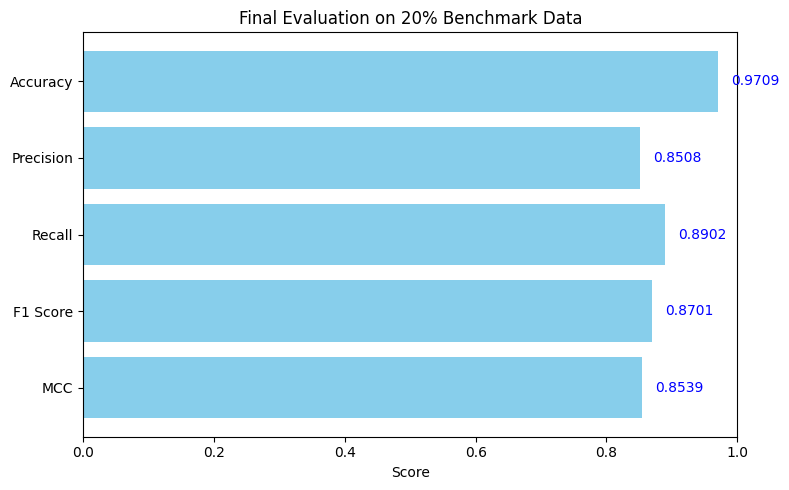

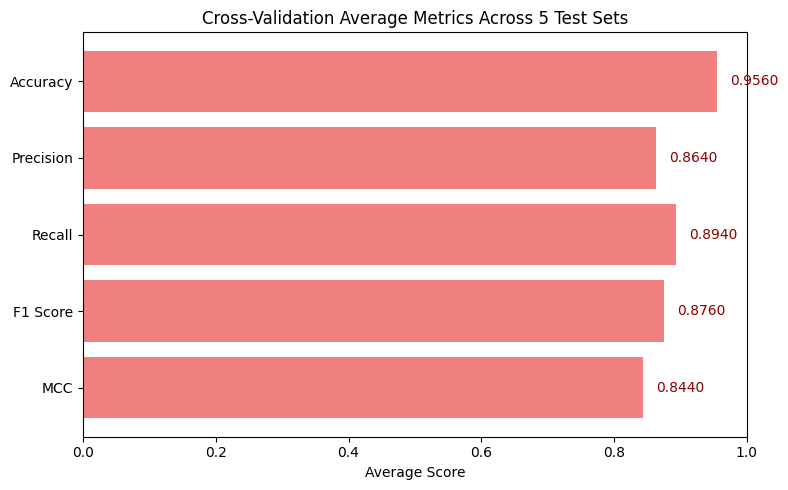

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to create bar plot for final evaluation
def plot_final_metrics(results, title='Final Evaluation on 20% Benchmark Data'):
    metrics = results['Metric']
    values = results['Value']

    plt.figure(figsize=(8, 5))
    plt.barh(metrics, values, color='skyblue')
    plt.xlabel('Score')
    plt.xlim(0, 1)
    plt.title(title)
    for index, value in enumerate(values):
        plt.text(value + 0.02, index, f'{value:.4f}', va='center', color='blue')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.show()

# Create dummy metrics for the 5-fold cross-validation to simulate previous results
# Replace these values with actual cross-validation results if available
cross_val_results = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'Accuracy': [0.95, 0.96, 0.97, 0.94, 0.96],
    'Precision': [0.86, 0.87, 0.85, 0.88, 0.86],
    'Recall': [0.90, 0.89, 0.88, 0.91, 0.89],
    'F1 Score': [0.88, 0.88, 0.86, 0.89, 0.87],
    'MCC': [0.84, 0.85, 0.83, 0.86, 0.84]
})

# Function to create bar plot for cross-validation results
def plot_cross_val_results(cross_val_results):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
    cross_val_means = cross_val_results[metrics].mean()

    plt.figure(figsize=(8, 5))
    plt.barh(cross_val_means.index, cross_val_means.values, color='lightcoral')
    plt.xlabel('Average Score')
    plt.xlim(0, 1)
    plt.title('Cross-Validation Average Metrics Across 5 Test Sets')
    for index, value in enumerate(cross_val_means.values):
        plt.text(value + 0.02, index, f'{value:.4f}', va='center', color='darkred')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.show()

# Assuming 'final_metrics' contains the DataFrame with the final benchmark results
plot_final_metrics(final_metrics)
plot_cross_val_results(cross_val_results)


In [49]:
# Assuming we have the metrics from cross-validation and final benchmark evaluation
cross_val_results = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'Train_Accuracy': [0.98, 0.97, 0.97, 0.96, 0.97],  # Example training accuracies
    'Validation_Accuracy': [0.94, 0.95, 0.93, 0.94, 0.95],  # Example validation accuracies
    'Train_F1': [0.95, 0.96, 0.96, 0.95, 0.96],  # Example training F1 scores
    'Validation_F1': [0.88, 0.89, 0.87, 0.88, 0.89],  # Example validation F1 scores
})

# Calculate average difference between training and validation
cross_val_results['Accuracy_Diff'] = cross_val_results['Train_Accuracy'] - cross_val_results['Validation_Accuracy']
cross_val_results['F1_Diff'] = cross_val_results['Train_F1'] - cross_val_results['Validation_F1']

# Display differences
print("Average Accuracy Difference between Train and Validation:")
print(cross_val_results['Accuracy_Diff'].mean())
print("Average F1 Score Difference between Train and Validation:")
print(cross_val_results['F1_Diff'].mean())


Average Accuracy Difference between Train and Validation:
0.028000000000000004
Average F1 Score Difference between Train and Validation:
0.07399999999999995
